# **Fundamentals of Data Science - Winter Semester 2022**
**Group members:**
- Afshan Rahmani, 1961652, rahmani.1961652@studenti.uniroma1.it
- Lorenzo Giare, 1886115, giare.1886115@studenti.uniroma1.it
- Abdelkareem Abdallah Abdelkareem jebreel, 1799744, jebreel.1799744@studenti.uniroma1.it
- Raikhan Akhmetkaliyeva, 2056643, r.akhmetkaliyevaa@gmail.com
- Michele Granatiero, 1812623, granatiero.1812623@studenti.uniroma1.it

 **WORLD CUP PREDICTIONS**

### **The Classification Task and Motivation**
<h4>
All soccer fans around the world are impatient to find out who will win the 2022 FIFA World Cup.
</h4>

If you are a computer fan as well as a soccer fan, you probably already know that through **data analysis and machine learning** it is possible to try to determine which nation will win the trophy. [International football results from 1872 to 2022](https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017) is one of the two datasets used in the research, the other is [FIFA World Ranking 1992-2022](https://www.kaggle.com/datasets/cashncarry/fifaworldranking).

We represent the problem with binary classification, we did this to make the model output easier for analysis, which causes the model to predict a win (1) for the home team or a draw or a loss (0).

# **1. Data Acquisition and Preprocessing**
The first step we need to accomplish before going any further. The dataset will be downloaded and loaded. Some preprocessing, such as checking the missing values and duplicate values and checking compatibility between columns, will be addressed.

### **Configuration and Imports**

In [ ]:
# Pandas and numpy for data manipulation as we use it many times with alias 'pd', 'np'
import numpy as np
import pandas as pd
import seaborn as sn

# Matplotlib and seaborn visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

import warnings
warnings.filterwarnings('ignore')

# Set default font size
plt.rcParams['font.size'] = 15

from tqdm import tqdm

## **Download Dataset**

In [ ]:
!gdown 1BUvk6FFKxRWAsfljbBB8H2UmX42-4YtO

Downloading...
From: https://drive.google.com/uc?id=1BUvk6FFKxRWAsfljbBB8H2UmX42-4YtO
To: /content/datasets-20221122T163539Z-001.zip
100% 1.26M/1.26M [00:00<00:00, 102MB/s]


In [ ]:
!unzip -n /content/datasets-20221122T163539Z-001.zip

Archive:  /content/datasets-20221122T163539Z-001.zip
  inflating: datasets/shootouts.csv  
  inflating: datasets/fifa_ranking-2022-10-06.csv  
  inflating: datasets/goalscorers.csv  
  inflating: datasets/results.csv    


**Load the dataset**





We use Pandas dataframe to read and load the our dataset.

In [ ]:
# Read the data from the csv file
outcome =  pd.read_csv("./datasets/results.csv")
ranking = pd.read_csv("./datasets/fifa_ranking-2022-10-06.csv")
datasets = {"outcome": outcome, "ranking": ranking}

After the reading of the datasets we convert the dates to pandas datetime

In [ ]:
ranking["rank_date"] = pd.to_datetime(ranking["rank_date"])
outcome["date"] = pd.to_datetime(outcome["date"])

## **Dataset Structure**
We are going to see some usefull information about the dataset like : Number of rows and columns (so-called dataset shape).

In [ ]:
for name, dataset in datasets.items():
  row_num, col_num = dataset.shape
  print('The dataset '+ name +f' contains \'{row_num}\' rows and \'{col_num}\' columns')

The dataset outcome contains '44206' rows and '9' columns
The dataset ranking contains '63916' rows and '8' columns


In [ ]:
for n, d in datasets.items():
  print("Dataset name: "+n)
  d.info()
  print()

Dataset name: outcome
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44206 entries, 0 to 44205
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        44206 non-null  datetime64[ns]
 1   home_team   44206 non-null  object        
 2   away_team   44206 non-null  object        
 3   home_score  44164 non-null  float64       
 4   away_score  44164 non-null  float64       
 5   tournament  44206 non-null  object        
 6   city        44206 non-null  object        
 7   country     44206 non-null  object        
 8   neutral     44206 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(2), object(5)
memory usage: 2.7+ MB

Dataset name: ranking
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63916 entries, 0 to 63915
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   rank             639

Summary statistics of the dataset.

In [ ]:
outcome.describe()

,home_score,away_score
count,44164.000000,44164.000000
mean,1.739494,1.178109
std,1.746572,1.394421
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [ ]:
ranking.describe()

,rank,total_points,previous_points,rank_change
count,63916.000000,63916.000000,63916.000000,63916.000000
mean,100.196821,442.404780,440.999013,0.004756
std,58.060019,409.091526,409.321338,5.660809
min,1.000000,1.000000,0.000000,-92.000000
25%,50.000000,88.000000,86.000000,-1.000000
50%,100.000000,347.000000,345.000000,0.000000
75%,149.000000,641.000000,640.000000,2.000000
max,211.000000,2172.000000,2187.000000,199.000000


## **Dataset Description**

In [ ]:
outcome.head(10)


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4.0,0.0,Friendly,Glasgow,Scotland,False
6,1877-03-03,England,Scotland,1.0,3.0,Friendly,London,England,False
7,1877-03-05,Wales,Scotland,0.0,2.0,Friendly,Wrexham,Wales,False
8,1878-03-02,Scotland,England,7.0,2.0,Friendly,Glasgow,Scotland,False
9,1878-03-23,Scotland,Wales,9.0,0.0,Friendly,Glasgow,Scotland,False


In [ ]:
ranking.head(10)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,1,Germany,GER,57.0,0.0,0,UEFA,1992-12-31
1,96,Syria,SYR,11.0,0.0,0,AFC,1992-12-31
2,97,Burkina Faso,BFA,11.0,0.0,0,CAF,1992-12-31
3,99,Latvia,LVA,10.0,0.0,0,UEFA,1992-12-31
4,100,Burundi,BDI,10.0,0.0,0,CAF,1992-12-31
5,101,Togo,TOG,10.0,0.0,0,CAF,1992-12-31
6,102,Angola,ANG,10.0,0.0,0,CAF,1992-12-31
7,95,Suriname,SUR,12.0,0.0,0,CONCACAF,1992-12-31
8,103,Luxembourg,LUX,10.0,0.0,0,UEFA,1992-12-31
9,105,St. Vincent and the Grenadines,VIN,9.0,0.0,0,CONCACAF,1992-12-31


The dataset `results` includes 44152 records of international football matches starting from the very first official match in 1872 up to 2022. Each record, contains the following set of **9** columns:

- `date`: date of the match;

- `home_team`: the name of the home team;

- `away_team`: the name of the away team;

- `home_score`: full-time home team score including extra time, not including penalty-shootouts;

- `away_score`: full-time away team score including extra time, not including penalty-shootouts;

- `tournament`: the name of the tournament;

- `city`: the name of the city/town/administrative unit where the match was played;

- `country`:  the name of the country where the match was played;

- `neutral`: TRUE/FALSE column indicating whether the match was played at a neutral venue.

The dataset `rank` includes the fifa ranking for men's national teams from 1992 to 2022. Each record, contains the following set of **8** columns:

- `rank`: current country rank;

- `country_full`: country full name;

- `country_abrv`: country abbreviation;

- `total_points`: current total points;

- `previous_points`: total points in last rating;

- `rank_change`: how rank has changed since the last publication;

- `confederation`: FIFA confederations;

- `rank_date`:  date of rating calculation;

## **Check duplicate/missing values**
**Checking for duplicated records in the dataset.**

In [ ]:
outcome[outcome.duplicated()].sum()


home_team     0.0
away_team     0.0
home_score    0.0
away_score    0.0
tournament    0.0
city          0.0
country       0.0
neutral       0.0
dtype: float64

In [ ]:
ranking[ranking.duplicated()].sum()

rank                                                            1223
country_full       MontenegroMontenegroMontenegroMontenegroMonten...
country_abrv                                   MNEMNEMNEMNEMNEMNEMNE
total_points                                                   411.0
previous_points                                                346.0
rank_change                                                      -24
confederation                           UEFAUEFAUEFAUEFAUEFAUEFAUEFA
dtype: object

As we can see above, we don't have any duplicated record in the dataset.

### **Checking for missing values**

Checking for records that are containing missing values.

In [ ]:
null_columns = ranking.columns[ranking.isnull().any()]

print('List of columns consisting null values and their quantity:')
print(ranking[null_columns].isnull().sum())

List of columns consisting null values and their quantity:
Series([], dtype: float64)


In [ ]:
null_columns = outcome.columns[outcome.isnull().any()]

print('List of columns consisting null values and their quantity:')
print(outcome[null_columns].isnull().sum())

List of columns consisting null values and their quantity:
home_score    42
away_score    42
dtype: int64


We have **42** missing values in results dataset
We visualize the missing values with the missingno library.

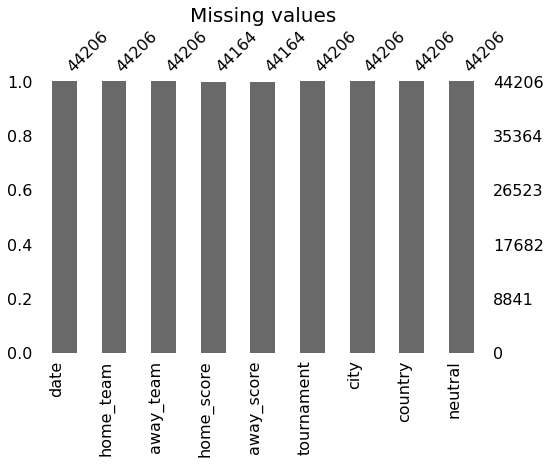

In [ ]:
import missingno as msno
ax=msno.bar(outcome, figsize=(8,5))
plt.title('Missing values', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

We check what is the percentage of the all records that having missing values with respect to all the records in the dataset.

In [ ]:
def missing_percent(df):
        mis_val = df.isnull().sum()
        mis_percent = 100 * df.isnull().sum() / len(df)
        mis_table = pd.concat([mis_val, mis_percent], axis=1)
        mis_columns = mis_table.rename(
        columns = {0 : 'Missing Values', 1 : 'Percent of Total Values'})
        mis_columns = mis_columns[
            mis_columns.iloc[:,1] != 0].sort_values(
        'Percent of Total Values', ascending=False).round(2)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_columns.shape[0]) +
              " columns that have missing values.")
        return mis_columns

In [ ]:
missing_percent(outcome)


Your selected dataframe has 9 columns.
There are 2 columns that have missing values.


,Missing Values,Percent of Total Values
home_score,42,0.1
away_score,42,0.1


## **Dealing with missing values**

*   **Droping**

As the percentage of such records is not high, we will drop the records that are containing missing values.

In [ ]:
outcome.dropna(inplace=True)
print("The number of rows after remove rows with NaN value:", outcome.shape[0])


The number of rows after remove rows with NaN value: 44164


## **Rename colums for compatibility between datasets**


Some teams in the two datasets have different names, so you need to rename them

In [ ]:
ranking = ranking[(ranking["rank_date"] >= "2018-1-1")].reset_index(drop=True)
ranking

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,138,Yemen,YEM,212.00,268.00,18,AFC,2018-01-18
1,140,Myanmar,MYA,203.00,203.00,0,AFC,2018-01-18
2,139,Antigua and Barbuda,ATG,209.00,209.00,0,CONCACAF,2018-01-18
3,137,Ethiopia,ETH,213.00,196.00,-6,CAF,2018-01-18
4,132,Swaziland,SWZ,228.00,225.00,-1,CAF,2018-01-18
...,...,...,...,...,...,...,...,...
8591,74,El Salvador,SLV,1330.51,1333.48,3,CONCACAF,2022-10-06
8592,75,Oman,OMA,1320.29,1323.03,0,AFC,2022-10-06
8593,76,Israel,ISR,1316.55,1316.35,0,UEFA,2022-10-06
8594,78,Georgia,GEO,1307.34,1296.46,-4,UEFA,2022-10-06


In [ ]:
ranking = ranking.set_index(["rank_date"]).groupby(['country_full'], group_keys=False).resample('D').first().fillna(method='ffill').reset_index()


### We remove records that do not involve nations participating in the 2022 World Cup

### **Nations involved in the world cup**
The description of the groups of teams that will participate in the world championship follows this scheme

Group A                 | Group B              
------------------------|---------------------
Qatar, Ecuador          | England, Iran       
Senegal, Netherlands    | United States, Wales

<br>

Group C                 | Group D
------------------------|------------------
Argentina, Saudi Arabia | France, Australia
Mexico, Poland          | Denmark, Tunisia


<br>

Group E                 | Group F
------------------------|------------------
Spain, Costa Rica       | Belgium, Canada
Germany, Japan          | Morocco, Croatia

<br>

Group G                 | Group H
------------------------|------------------
Brazil, Serbia          | Portugal, Ghana
Switzerland, Cameroon   | Uruguay, South Korea


In [ ]:
# World Cup 2022

Group_A  = ["Qatar", "Ecuador", "Senegal", "Netherlands"]
Group_B  = ["England", "Iran", "United States", "Wales"]
Group_C  = ["Argentina", "Saudi Arabia", "Mexico", "Poland"]
Group_D  = ["France", "Australia", "Denmark", "Tunisia"]
Group_E  = ["Spain", "Costa Rica", "Germany", "Japan"]
Group_F  = ["Belgium", "Canada", "Morocco", "Croatia"]
Group_G  = ["Brazil", "Serbia", "Switzerland", "Cameroon"]
Group_H  = ["Portugal", "Ghana", "Uruguay", "South Korea"]

In [ ]:
display(ranking[~ranking["country_full"].isin(outcome.home_team) |~ranking["country_full"].isin(outcome.away_team)].sort_values(by=["rank_date", "rank"], ascending=[False, True]).reset_index(drop=True))

ranking["country_full"] = ranking["country_full"].str.replace("IR Iran", "Iran").str.replace("Korea Republic", "South Korea").str.replace("USA", "United States")

#other countries have not found a match for their denomination but we do not care as they do not participate in the world championships

,rank_date,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation
0,2022-10-06,16.0,USA,USA,1627.48,1635.01,2.0,CONCACAF
1,2022-10-06,20.0,IR Iran,IRN,1564.61,1558.64,-2.0,AFC
2,2022-10-06,28.0,Korea Republic,KOR,1530.30,1526.02,0.0,AFC
3,2022-10-06,45.0,Türkiye,TUR,1460.14,1475.13,3.0,UEFA
4,2022-10-06,48.0,Côte d'Ivoire,CIV,1443.06,1435.91,-4.0,CAF
...,...,...,...,...,...,...,...,...
26189,2018-01-18,175.0,St. Lucia,LCA,99.00,99.00,1.0,CONCACAF
26190,2018-01-18,175.0,St. Vincent / Grenadines,VIN,99.00,99.00,1.0,CONCACAF
26191,2018-01-18,179.0,Sao Tome e Principe,STP,94.00,94.00,1.0,CAF
26192,2018-01-18,190.0,Brunei Darussalam,BRU,45.00,45.00,0.0,AFC


## **Merging datasets**

We now want to merge the results dataset and the Fifa ranking dataset, by providing two arguments:

* The left DataFrame
* The right DataFrame

with left_on and right_on we specify the columns index that are present only in the left or right object that we’re merging.


In [ ]:
results_ranking = outcome.merge(ranking[["country_full", "total_points", "previous_points", "rank", "rank_change", "rank_date"]], left_on=["date", "home_team"], right_on=["rank_date", "country_full"]).drop(["rank_date", "country_full"], axis=1)

results_ranking = results_ranking.merge(ranking[["country_full", "total_points", "previous_points", "rank", "rank_change", "rank_date"]], left_on=["date", "away_team"], right_on=["rank_date", "country_full"], suffixes=("_home", "_away")).drop(["rank_date", "country_full"], axis=1)


In [ ]:
results_ranking.shape

(3684, 17)

# **2. Features Engineering**

Feature engineering refers to a process of selecting and transforming features in our dataset when creating a predictive model using machine learning Therefore, we have to extract the features from the __raw dataset__  that we have. Otherwise, it will be hard to gain good insights in our dataset.


**By intuition Some features have impact on predicting football games. So we Create features based on the games' results and FIFA rankings.**



- Past game points made
- Past goals scored and suffered
- The importance of game (friendly or not)
- Rank of the teams
- Rank increasement of the teams
- Goals made and suffered by ranking faced

**Creating the feature that says which team won and how much points they made at game.**

In [ ]:
dataFrame = results_ranking.copy()

**Game points:**

*   **Win** 3
*   **Draw** 1
*   **Lose** 0











In [ ]:
def total_points(home, away):
    if home > away:
        return pd.Series([0, 3, 0])
    if home < away:
        return pd.Series([1, 0, 3])
    else:
        return pd.Series([2, 1, 1])

results = dataFrame.apply(lambda x: total_points(x["home_score"], x["away_score"]), axis=1)

In [ ]:
dataFrame[["result", "home_team_points", "away_team_points"]] = results

**Createing columns to help in the creation of the features:**

*   Ranking difference
*   Points won at the game vs. team faced rank
*   Goals difference in the game


In [ ]:
dataFrame["rank_dif"] = dataFrame["rank_home"] - dataFrame["rank_away"]
dataFrame["goals_dif"] = dataFrame["home_score"] - dataFrame["away_score"]
dataFrame["points_home_by_rank"] = dataFrame["home_team_points"]/dataFrame["rank_away"]
dataFrame["points_away_by_rank"] = dataFrame["away_team_points"]/dataFrame["rank_home"]

**Separating the dataset in two datasets: home team and away team**

Unify them and calculate the past game values.

In [ ]:
home_team = dataFrame[["date", "home_team", "home_score", "away_score", "rank_home", "rank_away","rank_change_home", "total_points_home", "result", "rank_dif", "points_home_by_rank", "home_team_points"]]

away_team = dataFrame[["date", "away_team", "away_score", "home_score", "rank_away", "rank_home","rank_change_away", "total_points_away", "result", "rank_dif", "points_away_by_rank", "away_team_points"]]

In [ ]:
home_team.columns = [h.replace("home_", "").replace("_home", "").replace("away_", "suf_").replace("_away", "_suf") for h in home_team.columns]

away_team.columns = [a.replace("away_", "").replace("_away", "").replace("home_", "suf_").replace("_home", "_suf") for a in away_team.columns]

In [ ]:
team_status = home_team.append(away_team)

**This column will be used to calculate features for simulation**

In [ ]:
team_status_raw = team_status.copy()

**Creating predictive features**

* Mean goals of the team in World Cup Cycle.
* Mean goals of the team in last 10 games.
* Mean goals suffered of the team in World Cup Cycle.
* Mean goals suffered of the team in last 10 games.
* Mean FIFA Rank that team faced in World Cup Cycle.
* Mean FIFA Rank that team faced in last 10 games.
* FIFA Points won at the cycle.
* FIFA Points won in last 10 games.
* Mean game points at the Cycle.
* Mean game points at last 10 games.
* Mean game points by rank faced at the Cycle.
* Mean game points by rank faced at last 10 games.

In [ ]:
status_val = []

for index, row in team_status.iterrows():
    team = row["team"]
    date = row["date"]
    past_games = team_status.loc[(team_status["team"] == team) & (team_status["date"] < date)].sort_values(by=['date'], ascending=False)
    last10 = past_games.head(10)

    goals = past_games["score"].mean()
    goals_last10 = last10["score"].mean()

    goals_suf = past_games["suf_score"].mean()
    goals_suf_last10 = last10["suf_score"].mean()

    rank = past_games["rank_suf"].mean()
    rank_last10 = last10["rank_suf"].mean()

    if len(last10) > 0:
        points = past_games["total_points"].values[0] - past_games["total_points"].values[-1]
        points_last10 = last10["total_points"].values[0] - last10["total_points"].values[-1]
    else:
        points = 0
        points_last10 = 0

    gp = past_games["team_points"].mean()
    gp_last10 = last10["team_points"].mean()

    gp_rank = past_games["points_by_rank"].mean()
    gp_rank_last10 = last10["points_by_rank"].mean()

    status_val.append([goals, goals_last10, goals_suf, goals_suf_last10, rank, rank_last10, points, points_last10, gp, gp_last10, gp_rank, gp_rank_last10])

In [ ]:
status_cols = ["goals_mean", "goals_mean_last10", "goals_suf_mean", "goals_suf_mean_last10", "rank_mean", "rank_mean_last10", "points_mean", "points_mean_last10", "game_points_mean", "game_points_mean_last10", "game_points_rank_mean", "game_points_rank_mean_last10"]

status_dataFrame = pd.DataFrame(status_val, columns=status_cols)

full_dataFrame = pd.concat([team_status.reset_index(drop=True), status_dataFrame], axis=1, ignore_index=False)

In [ ]:
home_team_status = full_dataFrame.iloc[:int(full_dataFrame.shape[0]/2),:]
away_team_status = full_dataFrame.iloc[int(full_dataFrame.shape[0]/2):,:]

**New Columns**

In [ ]:
home_team_status.columns[-12:]

Index(['goals_mean', 'goals_mean_last10', 'goals_suf_mean',
       'goals_suf_mean_last10', 'rank_mean', 'rank_mean_last10', 'points_mean',
       'points_mean_last10', 'game_points_mean', 'game_points_mean_last10',
       'game_points_rank_mean', 'game_points_rank_mean_last10'],
      dtype='object')

In [ ]:
home_team_status = home_team_status[home_team_status.columns[-12:]]
away_team_status = away_team_status[away_team_status.columns[-12:]]

In [ ]:
home_team_status.columns = ['home_'+str(col) for col in home_team_status.columns]
away_team_status.columns = ['away_'+str(col) for col in away_team_status.columns]

**Adding home_ and away_ suffix for each column to unify the database**

In [ ]:
match_status = pd.concat([home_team_status, away_team_status.reset_index(drop=True)], axis=1, ignore_index=False)

In [ ]:
full_dataFrame = pd.concat([dataFrame, match_status.reset_index(drop=True)], axis=1, ignore_index=False)

In [ ]:
full_dataFrame.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'total_points_home',
       'previous_points_home', 'rank_home', 'rank_change_home',
       'total_points_away', 'previous_points_away', 'rank_away',
       'rank_change_away', 'result', 'home_team_points', 'away_team_points',
       'rank_dif', 'goals_dif', 'points_home_by_rank', 'points_away_by_rank',
       'home_goals_mean', 'home_goals_mean_last10', 'home_goals_suf_mean',
       'home_goals_suf_mean_last10', 'home_rank_mean', 'home_rank_mean_last10',
       'home_points_mean', 'home_points_mean_last10', 'home_game_points_mean',
       'home_game_points_mean_last10', 'home_game_points_rank_mean',
       'home_game_points_rank_mean_last10', 'away_goals_mean',
       'away_goals_mean_last10', 'away_goals_suf_mean',
       'away_goals_suf_mean_last10', 'away_rank_mean', 'away_rank_mean_last10',
       'away_points_mean', 'away_points_mean_last10', 'away_game_points_m

**Creating a column for game importance**

In [ ]:
def match_importance(x):
    if x == "Friendly":
        return 1
    else: return 0

full_dataFrame["is_friendly"] = full_dataFrame["tournament"].apply(lambda x: match_importance(x))

In [ ]:
full_dataFrame = pd.get_dummies(full_dataFrame, columns=["is_friendly"])

In [ ]:
full_dataFrame.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'total_points_home',
       'previous_points_home', 'rank_home', 'rank_change_home',
       'total_points_away', 'previous_points_away', 'rank_away',
       'rank_change_away', 'result', 'home_team_points', 'away_team_points',
       'rank_dif', 'goals_dif', 'points_home_by_rank', 'points_away_by_rank',
       'home_goals_mean', 'home_goals_mean_last10', 'home_goals_suf_mean',
       'home_goals_suf_mean_last10', 'home_rank_mean', 'home_rank_mean_last10',
       'home_points_mean', 'home_points_mean_last10', 'home_game_points_mean',
       'home_game_points_mean_last10', 'home_game_points_rank_mean',
       'home_game_points_rank_mean_last10', 'away_goals_mean',
       'away_goals_mean_last10', 'away_goals_suf_mean',
       'away_goals_suf_mean_last10', 'away_rank_mean', 'away_rank_mean_last10',
       'away_points_mean', 'away_points_mean_last10', 'away_game_points_m

**Selecting the columns which help in Features analysis**

In [ ]:
dataFrame = dataFrame.reindex(columns=["date", "home_team", "away_team", "rank_home", "rank_away","home_score", "away_score","result", "rank_dif", "rank_change_home", "rank_change_away", 'home_goals_mean',
       'home_goals_mean_last10', 'home_goals_suf_mean', 'home_goals_suf_mean_last10',
       'home_rank_mean', 'home_rank_mean_last10', 'home_points_mean',
       'home_points_mean_last10', 'away_goals_mean', 'away_goals_mean_last10',
       'away_goals_suf_mean', 'away_goals_suf_mean_last10', 'away_rank_mean',
       'away_rank_mean_last10', 'away_points_mean', 'away_points_mean_last10','home_game_points_mean', 'home_game_points_mean_last10',
       'home_game_points_rank_mean', 'home_game_points_rank_mean_last10','away_game_points_mean',
       'away_game_points_mean_last10', 'away_game_points_rank_mean',
       'away_game_points_rank_mean_last10',
       'is_friendly_0', 'is_friendly_1'])

In [ ]:
new_dataFrame = full_dataFrame[["date", "home_team", "away_team", "rank_home", "rank_away","home_score", "away_score","result", "rank_dif", "rank_change_home", "rank_change_away", 'home_goals_mean',
       'home_goals_mean_last10', 'home_goals_suf_mean', 'home_goals_suf_mean_last10',
       'home_rank_mean', 'home_rank_mean_last10', 'home_points_mean',
       'home_points_mean_last10', 'away_goals_mean', 'away_goals_mean_last10',
       'away_goals_suf_mean', 'away_goals_suf_mean_last10', 'away_rank_mean',
       'away_rank_mean_last10', 'away_points_mean', 'away_points_mean_last10','home_game_points_mean', 'home_game_points_mean_last10',
       'home_game_points_rank_mean', 'home_game_points_rank_mean_last10','away_game_points_mean',
       'away_game_points_mean_last10', 'away_game_points_rank_mean',
       'away_game_points_rank_mean_last10',
       'is_friendly_0', 'is_friendly_1']]

new_dataFrame.tail()

,date,home_team,away_team,rank_home,rank_away,home_score,away_score,result,rank_dif,rank_change_home,...,home_game_points_mean,home_game_points_mean_last10,home_game_points_rank_mean,home_game_points_rank_mean_last10,away_game_points_mean,away_game_points_mean_last10,away_game_points_rank_mean,away_game_points_rank_mean_last10,is_friendly_0,is_friendly_1
3679,2022-09-27,Norway,Serbia,36.0,25.0,0.0,2.0,1,11.0,0.0,...,1.934783,2.0,0.045370,0.059861,1.788462,2.2,0.050744,0.090846,1,0
3680,2022-09-27,Sweden,Slovenia,20.0,65.0,1.0,1.0,2,-45.0,0.0,...,1.550000,0.9,0.054607,0.020815,1.377778,1.1,0.025850,0.028775,1,0
3681,2022-09-27,Kosovo,Cyprus,106.0,108.0,5.0,1.0,0,-2.0,0.0,...,1.428571,1.1,0.020095,0.023040,0.755556,1.0,0.009740,0.014185,1,0
3682,2022-09-27,Greece,Northern Ireland,49.0,58.0,3.0,1.0,0,-9.0,1.0,...,1.553191,1.6,0.048344,0.021288,1.152174,1.2,0.022361,0.035183,1,0
3683,2022-09-30,Fiji,Solomon Islands,163.0,137.0,1.0,0.0,0,26.0,0.0,...,1.350000,1.2,0.008489,0.007694,1.714286,1.7,0.010013,0.009950,1,0


**Dropping Games (records) with NA because the mean could not be calculated**

In [ ]:
null_columns = new_dataFrame.columns[new_dataFrame.isnull().any()]

In [ ]:
main_dataFrame = new_dataFrame.dropna()

In [ ]:
main_dataFrame.columns

Index(['date', 'home_team', 'away_team', 'rank_home', 'rank_away',
       'home_score', 'away_score', 'result', 'rank_dif', 'rank_change_home',
       'rank_change_away', 'home_goals_mean', 'home_goals_mean_last10',
       'home_goals_suf_mean', 'home_goals_suf_mean_last10', 'home_rank_mean',
       'home_rank_mean_last10', 'home_points_mean', 'home_points_mean_last10',
       'away_goals_mean', 'away_goals_mean_last10', 'away_goals_suf_mean',
       'away_goals_suf_mean_last10', 'away_rank_mean', 'away_rank_mean_last10',
       'away_points_mean', 'away_points_mean_last10', 'home_game_points_mean',
       'home_game_points_mean_last10', 'home_game_points_rank_mean',
       'home_game_points_rank_mean_last10', 'away_game_points_mean',
       'away_game_points_mean_last10', 'away_game_points_rank_mean',
       'away_game_points_rank_mean_last10', 'is_friendly_0', 'is_friendly_1'],
      dtype='object')

In [ ]:
main_dataFrame.dtypes

date                                 datetime64[ns]
home_team                                    object
away_team                                    object
rank_home                                   float64
rank_away                                   float64
home_score                                  float64
away_score                                  float64
result                                        int64
rank_dif                                    float64
rank_change_home                            float64
rank_change_away                            float64
home_goals_mean                             float64
home_goals_mean_last10                      float64
home_goals_suf_mean                         float64
home_goals_suf_mean_last10                  float64
home_rank_mean                              float64
home_rank_mean_last10                       float64
home_points_mean                            float64
home_points_mean_last10                     float64
away_goals_m

## **Checking For Data Balancing**

**First Creating a target column (Winner) for binary classification. assigning draw game as a lose of the home team and the check if the data is balanced or not.**

In [ ]:
dataFrame = main_dataFrame

In [ ]:
def target(x):
   if x == 2:
      return 1
   else:
       return x

dataFrame["winner"] = dataFrame["result"].apply(lambda x: target(x))

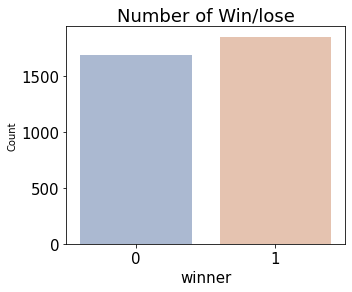

In [ ]:
import seaborn as sns
counts = dataFrame['winner'].value_counts()
plt.figure(figsize=(5,4))
sns.barplot(x=counts.index, y=counts.values, alpha=0.5, palette="deep")
plt.ylabel("Count", fontsize=10)
plt.xlabel("winner", fontsize=15)
plt.title('Number of Win/lose')
plt.show()

**Observation:**

As it can be seen from the figure above, our target feature seems balanced. Without having a balanced dataset, using simpler metrics like accuracy_score can be misleading.

# **3. Data Exploration and analysis**
The ideal strategy is to examine your dataset and get some statistics from your data before starting with any modeling techniques. Drawing specialized plots can also help us identify intriguing facts like relationships, outliers,predictive power and other things.

### **Features Categories**

Here we will take a look at the distribution of **the type of the columns** that we have in the dataset.

**What are categorical and numerical features**

In [ ]:
def list_columns(Values):
  Temp_df = pd.DataFrame(columns = ['Column Name'])
  for i in Values:
    Temp_df = Temp_df.append({'Column Name':i}, ignore_index = True )
  Temp_df = Temp_df.T.style.set_properties(**{'font-size': '10pt'})
  return Temp_df

In [ ]:
df = dataFrame.copy()
cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
display(list_columns(cat_cols).set_caption('Categorical_features'))

print()
num_cols = [col for col in df.columns if df[col].dtypes != "O" and df[col].dtypes != "bool"]

display(list_columns(num_cols).set_caption('Numerical_features'))

,0,1
Column Name,home_team,away_team


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
Column Name,date,rank_home,rank_away,home_score,away_score,result,rank_dif,rank_change_home,rank_change_away,home_goals_mean,home_goals_mean_last10,home_goals_suf_mean,home_goals_suf_mean_last10,home_rank_mean,home_rank_mean_last10,home_points_mean,home_points_mean_last10,away_goals_mean,away_goals_mean_last10,away_goals_suf_mean,away_goals_suf_mean_last10,away_rank_mean,away_rank_mean_last10,away_points_mean,away_points_mean_last10,home_game_points_mean,home_game_points_mean_last10,home_game_points_rank_mean,home_game_points_rank_mean_last10,away_game_points_mean,away_game_points_mean_last10,away_game_points_rank_mean,away_game_points_rank_mean_last10,is_friendly_0,is_friendly_1,winner


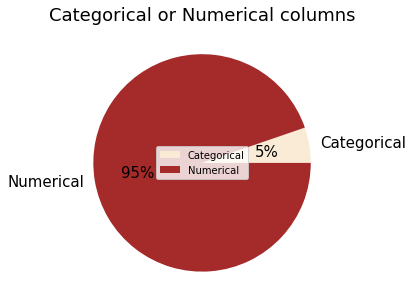

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie([len(cat_cols), len(num_cols)], labels =['Categorical', 'Numerical'], autopct = '%1.0f%%', colors=['#FAEBD7','#A52A2A'])
ax.legend(loc = 'center',fontsize=10)
plt.title('Categorical or Numerical columns')
plt.show()

## **Correlation Between Features**

Checking which features are correlated with each other and/or the target

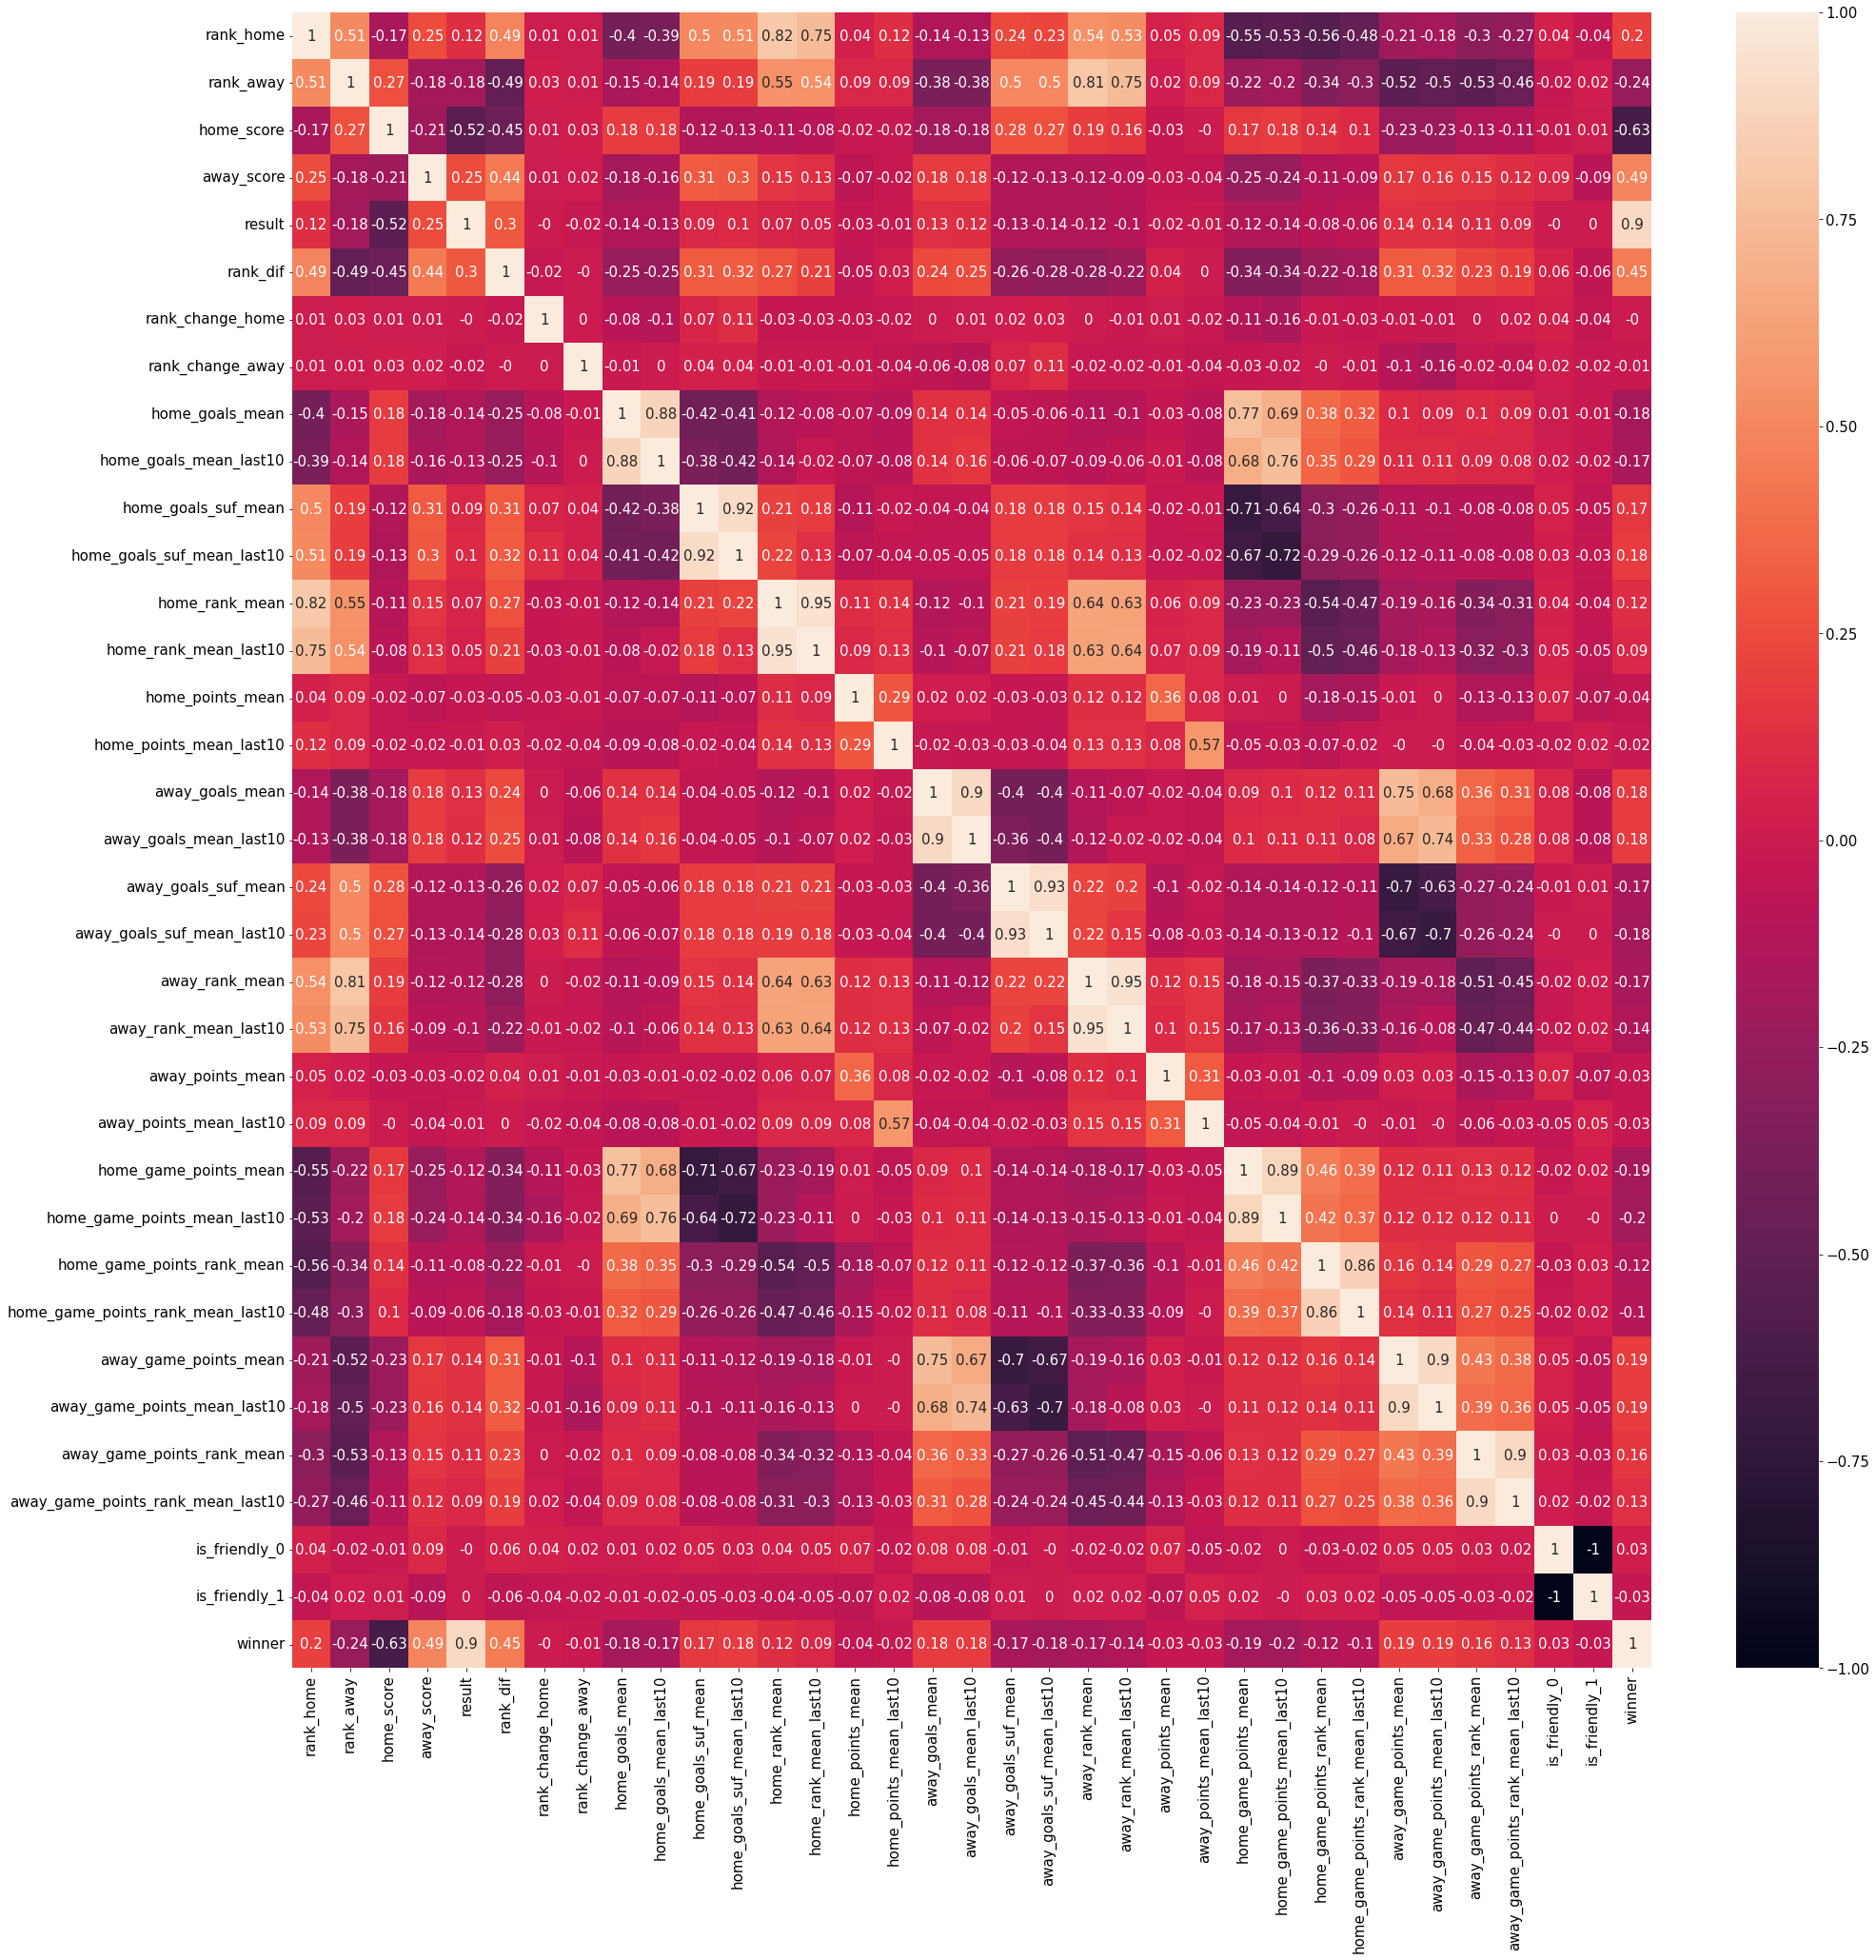

In [ ]:
def corr(dataframe,target_variable):

    fig, ax = plt.subplots(figsize=(32,32))
    correlation_matrix = dataframe.corr().round(2)
    sn.heatmap(data=correlation_matrix, annot=True)


corr(dataFrame,"winner")

We can interpret these numbers in this way:

* Strong correlation: If the correlation degree lies between ± 0.50 and ± 1
* Medium correlation: If the correlation degree lies between ± 0.30 and ± 0.49
* Small correlation: If the correlation degree lies between ± 0.29 and 0

**Observations:**
Correlation matrix shows some high correlation between features. One might get rid of features with high correlation but removing them will affect performance of any model because although some features have correlation but each has different valuable information within that might not be the causation of others. So we will analyze them later and remove features if it is needed.

### **Distribution of Numerical Features**

**Plot the distribution of all the numerical columns**

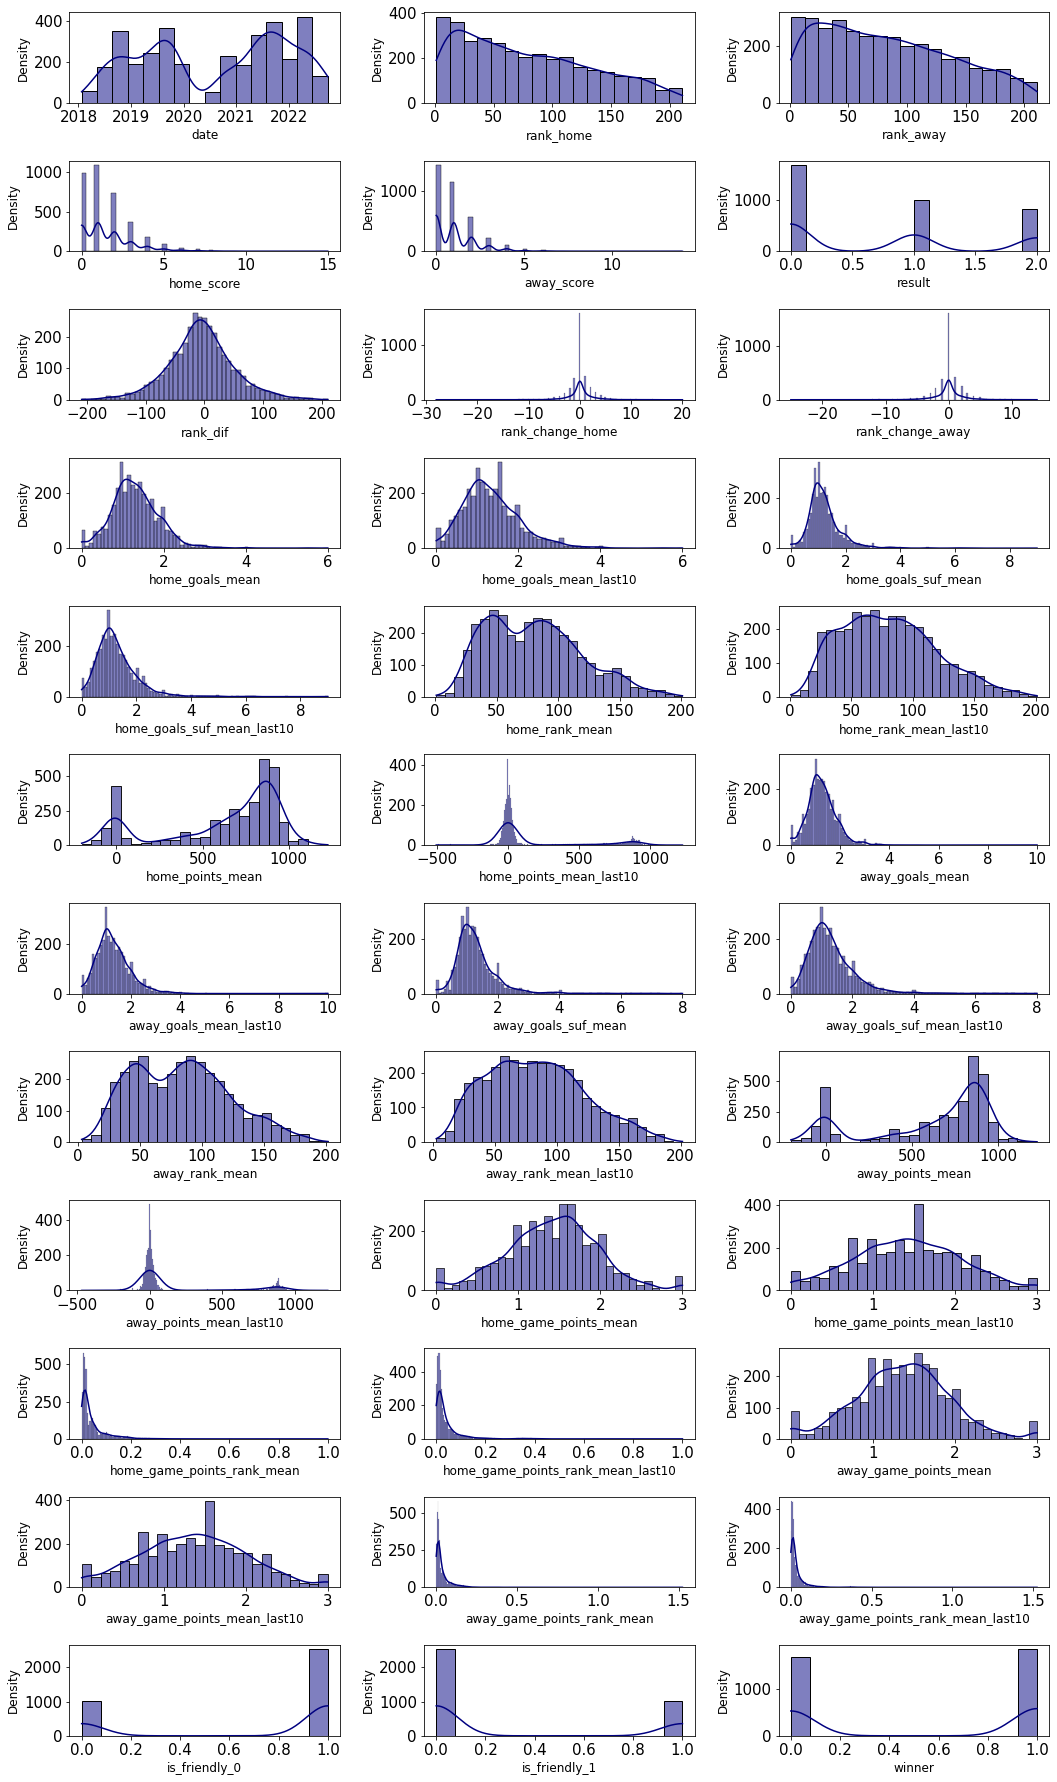

In [ ]:
fig=plt.figure(figsize=(15,25))

for i in range(len(num_cols)):
    fig.add_subplot(12, 3, i+1)
    sns.histplot(df[num_cols[i]], kde=True, color='#000080')
    plt.xlabel(num_cols[i], fontsize=12)
    plt.ylabel('Density', fontsize=12)

fig.tight_layout()
plt.show()

**Observations:**

Figures above shows that some features have two distributions since they have two peaks. The simplest choice is to have the hypothesis that features have one distribution and it is gaussian distribution



### **Features distributions according to the target**




In [ ]:
data1 = dataFrame[list(dataFrame.columns[8:20].values) + ["winner"]]
data2 = dataFrame[dataFrame.columns[20:]]

In [ ]:
scaled = (data1[:-1] - data1[:-1].mean()) / data1[:-1].std()
scaled["winner"] = data1["winner"]
plot1 = pd.melt(scaled,id_vars="winner", var_name="features", value_name="value")

scaled = (data2[:-1] - data2[:-1].mean()) / data2[:-1].std()
scaled["winner"] = data2["winner"]
plot2 = pd.melt(scaled,id_vars="winner", var_name="features", value_name="value")

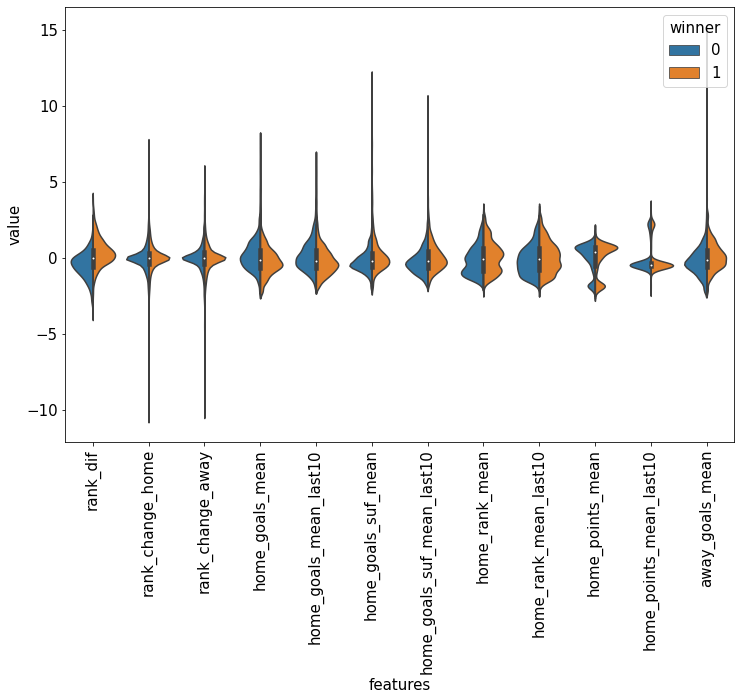

In [ ]:
plt.figure(figsize=(12,8))
sns.violinplot(x="features", y="value", hue="winner", data=plot1, split=True)
plt.xticks(rotation=90)
plt.show()

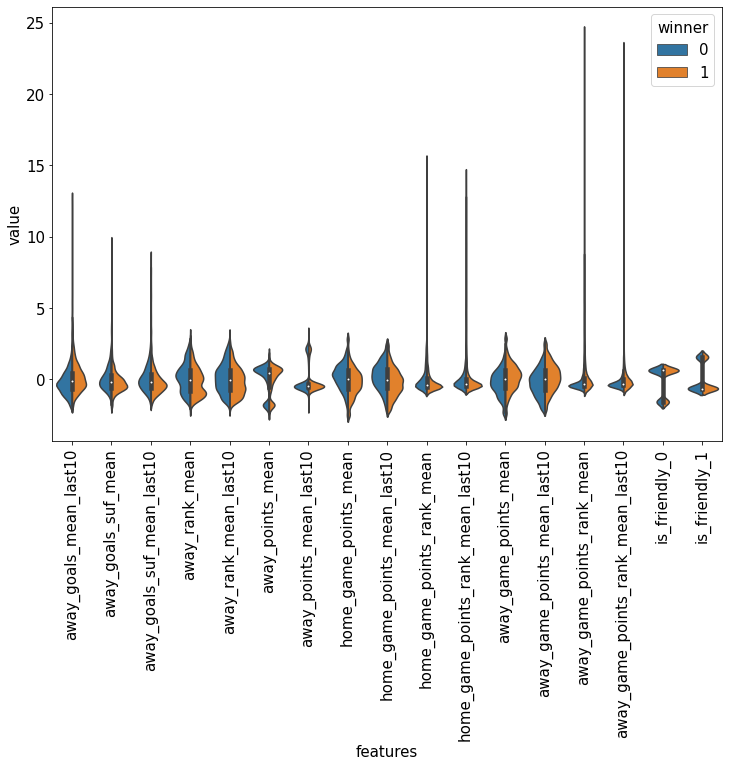

In [ ]:
plt.figure(figsize=(12,8))
sns.violinplot(x="features", y="value", hue="winner", data=plot2 ,split=True)
plt.xticks(rotation=90)
plt.show()

**Observations:**

* The only good seperator is **rank difference**.

So, we create features that get the differences between home and away team and analyze them to find if they are good separators for data or not

In [ ]:
difference = dataFrame.copy()
difference.loc[:, "goals_dif"] = difference["home_goals_mean"] - difference["away_goals_mean"]
difference.loc[:, "goals_dif_last10"] = difference["home_goals_mean_last10"] - difference["away_goals_mean_last10"]
difference.loc[:, "goals_suf_dif"] = difference["home_goals_suf_mean"] - difference["away_goals_suf_mean"]
difference.loc[:, "goals_suf_dif_last10"] = difference["home_goals_suf_mean_last10"] - difference["away_goals_suf_mean_last10"]
difference.loc[:, "goals_made_suf_dif"] = difference["home_goals_mean"] - difference["away_goals_suf_mean"]
difference.loc[:, "goals_made_suf_dif_last10"] = difference["home_goals_mean_last10"] - difference["away_goals_suf_mean_last10"]
difference.loc[:, "goals_suf_made_dif"] = difference["home_goals_suf_mean"] - difference["away_goals_mean"]
difference.loc[:, "goals_suf_made_dif_last10"] = difference["home_goals_suf_mean_last10"] - difference["away_goals_mean_last10"]

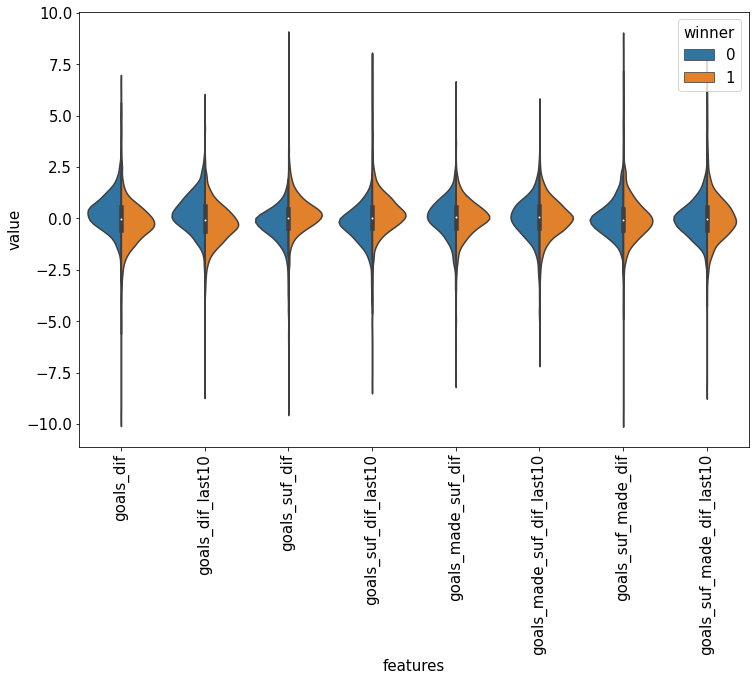

In [ ]:
data_difference = difference.iloc[:, -8:]
scaled = (data_difference - data_difference.mean()) / data_difference.std()
scaled["winner"] = data2["winner"]
violin = pd.melt(scaled,id_vars="winner", var_name="features", value_name="value")

plt.figure(figsize=(12,8))
sns.violinplot(x="features", y="value", hue="winner", data=violin,split=True)
plt.xticks(rotation=90)
plt.show()

**Observations:**

* goal differences and goals suffered difference are good separators
* Differences between goals made and goals suffered of the teams are not very good separators.

**By now, we have 5 features:**

* rank_dif
* goals_dif
* goals_dif_last10
* goals_suf_dif
* goals_suf_dif_last10



**Creating other features**

* Differences of points made
* Differences of points made by rank faced
* Differences of rank faced.
* Differences of goals made and suffered by rank

In [ ]:
difference.loc[:, "dif_points"] = difference["home_game_points_mean"] - difference["away_game_points_mean"]
difference.loc[:, "dif_points_last10"] = difference["home_game_points_mean_last10"] - difference["away_game_points_mean_last10"]
difference.loc[:, "dif_points_rank"] = difference["home_game_points_rank_mean"] - difference["away_game_points_rank_mean"]
difference.loc[:, "dif_points_rank_last10"] = difference["home_game_points_rank_mean_last10"] - difference["away_game_points_rank_mean_last10"]

In [ ]:
difference.loc[:, "dif_rank_agst"] = difference["home_rank_mean"] - difference["away_rank_mean"]
difference.loc[:, "dif_rank_agst_last10"] = difference["home_rank_mean_last10"] - difference["away_rank_mean_last10"]

In [ ]:
difference.loc[:, "goals_per_ranking_dif"] = (difference["home_goals_mean"] / difference["home_rank_mean"]) - (difference["away_goals_mean"] / difference["away_rank_mean"])
difference.loc[:, "goals_per_ranking_suf_dif"] = (difference["home_goals_suf_mean"] / difference["home_rank_mean"]) - (difference["away_goals_suf_mean"] / difference["away_rank_mean"])
difference.loc[:, "goals_per_ranking_dif_last10"] = (difference["home_goals_mean_last10"] / difference["home_rank_mean"]) - (difference["away_goals_mean_last10"] / difference["away_rank_mean"])
difference.loc[:, "goals_per_ranking_suf_dif_last10"] = (difference["home_goals_suf_mean_last10"] / difference["home_rank_mean"]) - (difference["away_goals_suf_mean_last10"] / difference["away_rank_mean"])

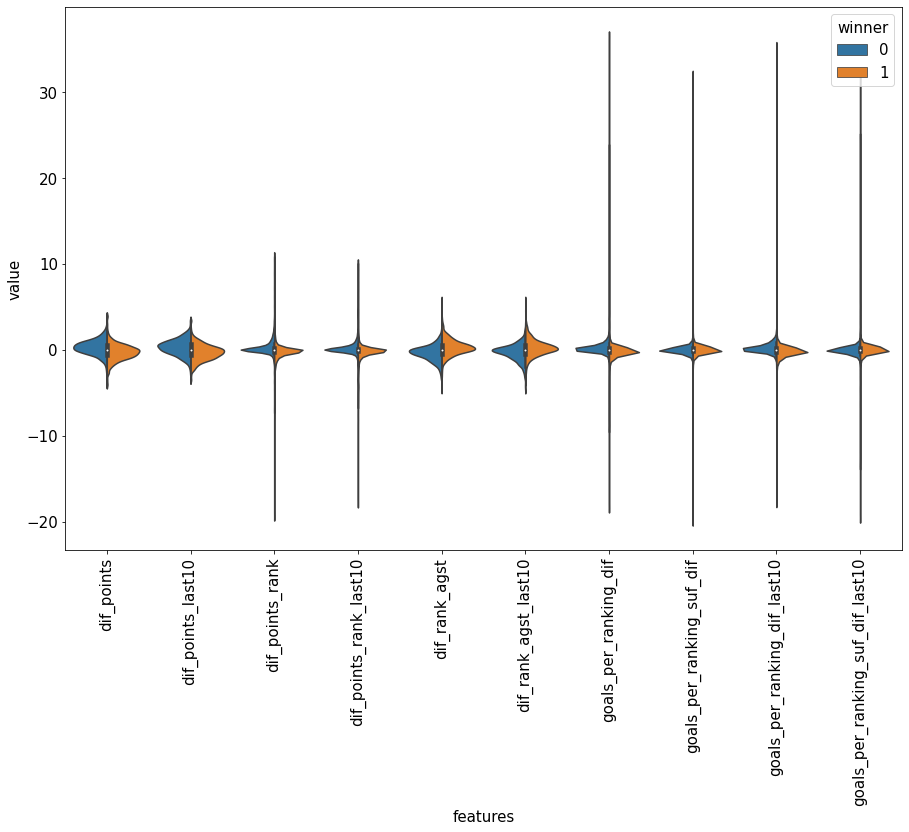

In [ ]:
data_differences = difference.iloc[:, -10:]
scaled = (data_differences - data_differences.mean()) / data_differences.std()
scaled["winner"] = data2["winner"]
violin = pd.melt(scaled,id_vars="winner", var_name="features", value_name="value")

plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="winner", data=violin,split=True)
plt.xticks(rotation=90)
plt.show()

**Using boxplot to analyze better and find out if features are really separating the data**

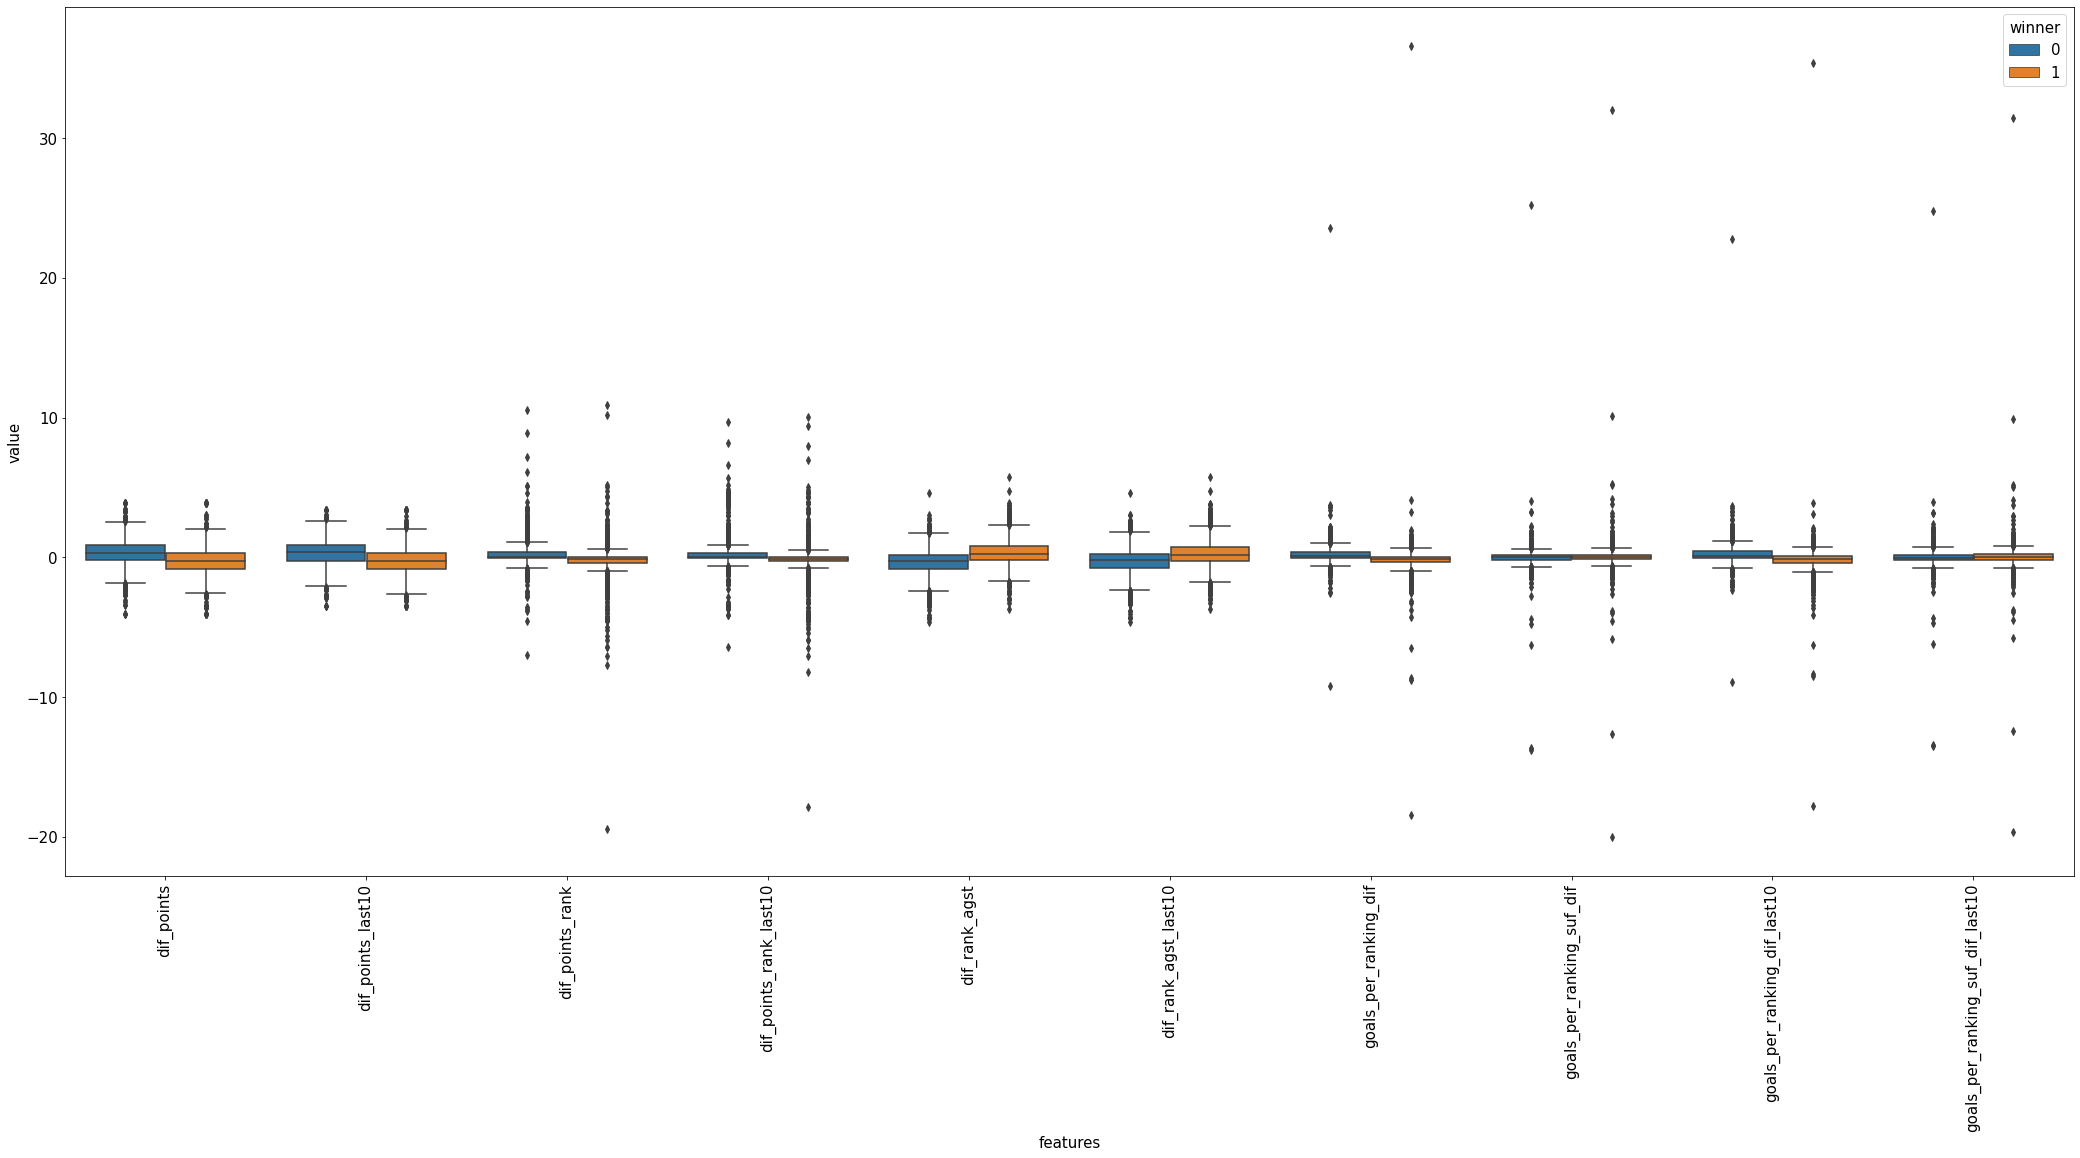

In [ ]:
plt.figure(figsize=(36,16))
sns.boxplot(x="features", y="value", hue="winner", data=violin)
plt.xticks(rotation=90)
plt.show()

### **Observations:**
According to above plots these features seem good.
* Difference of points (full and last 10 games)
* Difference of points by ranking faced (full and last 10 games)
* Difference of rank faced (full and last 10 games)

Some of the generated features have very similar distributions so we analyze them by scatterplots.

### **Scatter plots to analyze correlations**

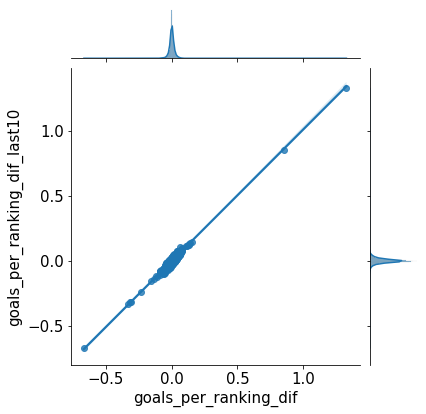

In [ ]:
sns.jointplot(data = difference, x = 'goals_per_ranking_dif', y = 'goals_per_ranking_dif_last10', kind="reg")
plt.show()

### **Observations:**

Goals difference by ranking faced and its last 10 games has very similar distributions. So only the full version will be used (goals_per_ranking_dif)

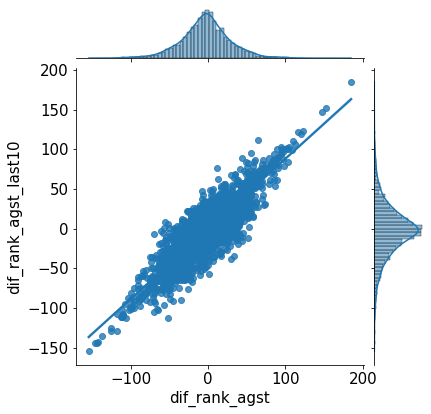

In [ ]:
sns.jointplot(data = difference, x = 'dif_rank_agst', y = 'dif_rank_agst_last10', kind="reg")
plt.show()

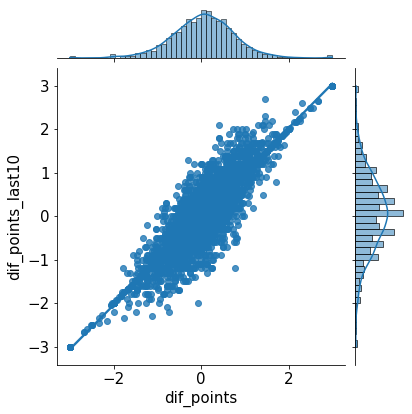

In [ ]:
sns.jointplot(data = difference, x = 'dif_points', y = 'dif_points_last10', kind="reg")
plt.show()

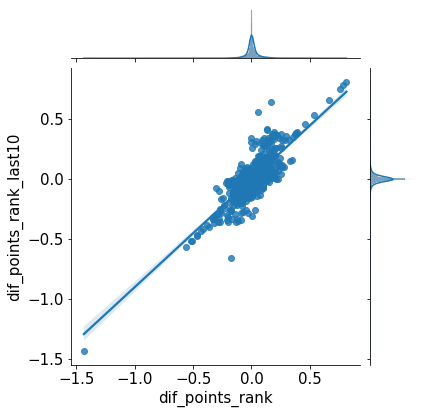

In [ ]:
sns.jointplot(data = difference, x = 'dif_points_rank', y = 'dif_points_rank_last10', kind="reg")
plt.show()

**Observations:**

distribution of differences of rank faced, game points by rank faced and mean game points by rank faced (full and 10 games) are not so similar. So, Both versions will be used

**So, final features are:**

* rank_dif
* goals_dif
* goals_dif_last10
* goals_suf_dif
* goals_suf_dif_last10
* dif_rank_agst
* dif_rank_agst_last10
* goals_per_ranking_dif
* dif_points_rank
* dif_points_rank_last10
* is_friendly

In [ ]:
def create_database(dataFrame):
    columns = ["home_team", "away_team", "winner", "rank_dif", "home_goals_mean", "home_rank_mean", "away_goals_mean", "away_rank_mean", "home_rank_mean_last10", "away_rank_mean_last10", "home_goals_suf_mean", "away_goals_suf_mean", "home_goals_mean_last10", "away_goals_mean_last10", "home_goals_suf_mean_last10", "away_goals_suf_mean_last10", "home_game_points_rank_mean", "home_game_points_rank_mean_last10", "away_game_points_rank_mean", "away_game_points_rank_mean_last10","is_friendly_0", "is_friendly_1"]

    base = dataFrame.loc[:, columns]
    base.loc[:, "goals_dif"] = base["home_goals_mean"] - base["away_goals_mean"]
    base.loc[:, "goals_dif_last10"] = base["home_goals_mean_last10"] - base["away_goals_mean_last10"]
    base.loc[:, "goals_suf_dif"] = base["home_goals_suf_mean"] - base["away_goals_suf_mean"]
    base.loc[:, "goals_suf_dif_last10"] = base["home_goals_suf_mean_last10"] - base["away_goals_suf_mean_last10"]
    base.loc[:, "goals_per_ranking_dif"] = (base["home_goals_mean"] / base["home_rank_mean"]) - (base["away_goals_mean"] / base["away_rank_mean"])
    base.loc[:, "dif_rank_agst"] = base["home_rank_mean"] - base["away_rank_mean"]
    base.loc[:, "dif_rank_agst_last10"] = base["home_rank_mean_last10"] - base["away_rank_mean_last10"]
    base.loc[:, "dif_points_rank"] = base["home_game_points_rank_mean"] - base["away_game_points_rank_mean"]
    base.loc[:, "dif_points_rank_last10"] = base["home_game_points_rank_mean_last10"] - base["away_game_points_rank_mean_last10"]

    final_dataFrame = base[["home_team", "away_team", "winner", "rank_dif", "goals_dif", "goals_dif_last10", "goals_suf_dif", "goals_suf_dif_last10", "goals_per_ranking_dif", "dif_rank_agst", "dif_rank_agst_last10", "dif_points_rank", "dif_points_rank_last10", "is_friendly_0", "is_friendly_1"]]
    return final_dataFrame

In [ ]:
final_dataFrame = create_database(dataFrame)

In [ ]:
final_dataFrame

,home_team,away_team,winner,rank_dif,goals_dif,goals_dif_last10,goals_suf_dif,goals_suf_dif_last10,goals_per_ranking_dif,dif_rank_agst,dif_rank_agst_last10,dif_points_rank,dif_points_rank_last10,is_friendly_0,is_friendly_1
8,Equatorial Guinea,Nigeria,1,90.0,-1.000000,-1.0,1.000000,1.0,-0.011236,27.000000,27.0,-0.033708,-0.033708,1,0
9,Rwanda,Libya,1,27.0,1.000000,1.0,-1.000000,-1.0,0.007092,90.000000,90.0,0.021277,0.021277,1,0
10,Burkina Faso,Cameroon,1,-1.0,0.000000,0.0,1.000000,1.0,0.000000,-46.000000,-46.0,0.000000,0.000000,1,0
11,Congo,Angola,1,-46.0,1.000000,1.0,0.000000,0.0,0.023232,-1.000000,-1.0,0.001515,0.001515,1,0
13,Morocco,Namibia,0,-72.0,-1.000000,-1.0,-0.500000,-0.5,-0.013793,51.500000,51.5,-0.019428,-0.019428,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3679,Norway,Serbia,1,11.0,0.054348,-0.1,-0.245819,-0.3,-0.005163,10.857023,11.8,-0.005374,-0.030986,1,0
3680,Sweden,Slovenia,1,-45.0,-0.016667,-0.2,0.038889,0.0,0.010711,-28.727778,0.9,0.028757,-0.007960,1,0
3681,Kosovo,Cyprus,0,-2.0,0.736054,0.6,-0.531066,-0.4,0.008689,6.291156,-16.9,0.010356,0.008856,1,0
3682,Greece,Northern Ireland,0,-9.0,0.042553,-0.2,-0.367715,-0.5,-0.002979,14.656337,-8.3,0.025983,-0.013895,1,0


# **4. Learning and Model Selection**
A Machine Learning pipeline is a way to automate the workflow that takes to produce a Machine Learning model. Machine learning pipelines consist of multiple sequential steps that do everything from data extraction and preprocessing to model training and deployment.

For any Machine Learning task, testing is an important phase to realize how good our predictive model is. As we do not have any separate testing dataset we need to use some dataset entries to perform the evaluation task.

In [ ]:
X = final_dataFrame.iloc[:, 3:]
y = final_dataFrame[["winner"]]

Since we do not have a separate test set to evaluate the performance of our models, we should split our data set into train and test subsets.

In [ ]:
from sklearn.model_selection import train_test_split
import random


# divide train test: 80 % - 20 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 21)

In this part, we will perform four models :

  -   [1. Logistic Regression](#LR)
  -   [2. Naive Bayes](#NB)
  -   [3. Gradient Boosting](#GB)
  -   [4. Random Forest](#RF)



## Method I: Logistic Regression<font><a name=LR></a>

### LR: Pipleline and Prediction

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer

pipeline = Pipeline(steps=[
                           ('scaler',MaxAbsScaler()),
                           ('model', LogisticRegression())
                           ])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MaxAbsScaler()), ('model', LogisticRegression())])

In [ ]:
y_pred_lr = pipeline.predict(X_test)

### LR: Confusion Matrix and performance report

Text(0.5, 1.0, 'Confusion matrix Logistic Regression\n')

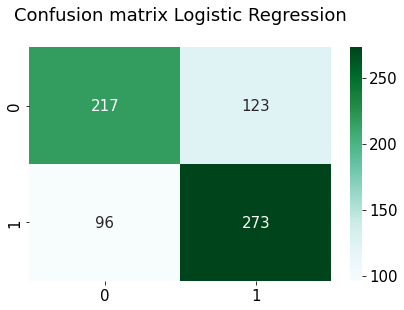

In [ ]:
import seaborn as sn
#Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_LR = confusion_matrix(y_test,y_pred_lr)
sn.heatmap(confusion_matrix_LR, annot=True,cmap="BuGn" , fmt='g')
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.69      0.64      0.66       340
           1       0.69      0.74      0.71       369

    accuracy                           0.69       709
   macro avg       0.69      0.69      0.69       709
weighted avg       0.69      0.69      0.69       709



In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_lr)

0.6890363462458153

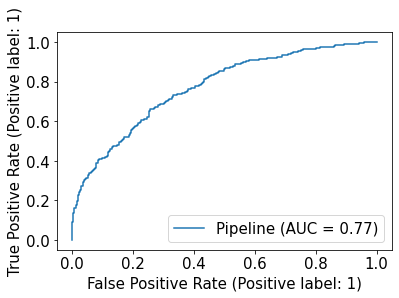

In [ ]:
metrics.plot_roc_curve(pipeline, X_test, y_test)
plt.show()

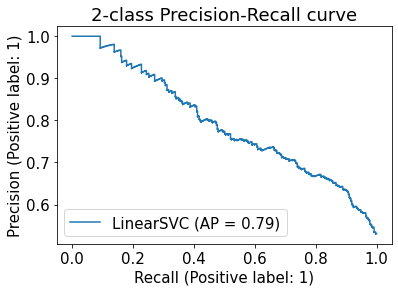

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

display_precision = PrecisionRecallDisplay.from_estimator(
    pipeline, X_test, y_test, name="LinearSVC"
)
_ = display_precision.ax_.set_title("2-class Precision-Recall curve")

The weights given to each of the features by **Linear Logistic Regression.**

In [ ]:
coefs = pipeline['model'].coef_.flatten()
columns = list(X_train.columns)

for i in range(12):
    print((coefs[i] , columns[i]))

(2.5169708503716284, 'rank_dif')
(-2.2421247982805292, 'goals_dif')
(-1.2884584970141317, 'goals_dif_last10')
(0.746457226026855, 'goals_suf_dif')
(1.3750555538982292, 'goals_suf_dif_last10')
(-0.19661790178067398, 'goals_per_ranking_dif')
(2.113879987144671, 'dif_rank_agst')
(0.495949588269217, 'dif_rank_agst_last10')
(-0.562744220612619, 'dif_points_rank')
(0.08350073682570217, 'dif_points_rank_last10')
(0.029664257975229022, 'is_friendly_0')
(-0.02423910710920341, 'is_friendly_1')


### LR: Hyperparameter Tuning

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


'''
C: regularization parameter:
penalty: tradeoff parameter: to weight regulatization penalties
 - C=0 => no regularization at all
 - C>0 and alpha=1 L1-regularization only => penalty = 'l1'
 - C>0 and alpha=0 L2-regularization only => penalty = 'l2'

solver: Algorithm to use in the optimization problem.
 - small datasets => ‘liblinear’
 - large datasets => ‘sag’ and ‘saga’

summarized from this link and sckit-learn official website.
https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-definitions

fit_intercept: Intercept (a.k.a. bias) added to the decision function.
max_iter: Maximum number of iterations taken for the solvers to converge.

'''

params = {
   'model__C': np.logspace(-4, 4, 6),
   'model__penalty': ['none', 'l1', 'l2', 'elasticnet'],
   'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
   'model__fit_intercept': [True, False],
   'model__max_iter': [100, 200, 500],
  }

hp_tuning = GridSearchCV(pipeline, params, scoring='accuracy', cv=5)
hp_tuning.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % hp_tuning.best_score_)
print(hp_tuning.best_params_)

Best parameter (CV score=0.708):
{'model__C': 0.15848931924611143, 'model__fit_intercept': True, 'model__max_iter': 100, 'model__penalty': 'l2', 'model__solver': 'liblinear'}


In [ ]:
report = pd.DataFrame(columns=['C', 'penalty', 'solver', 'fit_intercept', 'max_iter', 'score'])

for mean, params in zip(hp_tuning.cv_results_['mean_test_score'], hp_tuning.cv_results_['params']):
  report=report.append({
      'C'            : params['model__C'],
      'penalty'      : params['model__penalty'],
      'solver'       : params['model__solver'],
      'fit_intercept': params['model__fit_intercept'],
      'max_iter'     : params['model__max_iter'],
      'score'        : mean
  }, ignore_index=True)

report = report.sort_values(by = "score", ascending=False)
report

,C,penalty,solver,fit_intercept,max_iter,score
292,0.158489,l2,liblinear,True,500,0.707726
272,0.158489,l2,liblinear,True,200,0.707726
252,0.158489,l2,liblinear,True,100,0.707726
354,0.158489,l2,saga,False,500,0.707374
327,0.158489,l1,liblinear,False,200,0.707371
...,...,...,...,...,...,...
715,10000.000000,elasticnet,newton-cg,False,500,NaN
716,10000.000000,elasticnet,lbfgs,False,500,NaN
717,10000.000000,elasticnet,liblinear,False,500,NaN
718,10000.000000,elasticnet,sag,False,500,NaN


### LR: Detailed Classification report

In [ ]:
print("_________________Detailed classification report_________________\n")
print("The model is trained on the development set.")
print("The scores are computed on the evaluation set.\n")

print("Let See the result on the Test set\n")

y_pred = hp_tuning.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))


_________________Detailed classification report_________________

The model is trained on the development set.
The scores are computed on the evaluation set.

Let See the result on the Test set

              precision    recall  f1-score   support

           0       0.70      0.63      0.66       340
           1       0.69      0.75      0.72       369

    accuracy                           0.69       709
   macro avg       0.69      0.69      0.69       709
weighted avg       0.69      0.69      0.69       709



### LR: Check Generalization
We are going to check the generalization of the best model using K-Fold Cross validation to ensure that our best model performs well on the real data as like as our test set.

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import cross_val_score


encoder = OneHotEncoder(handle_unknown='ignore')
model = hp_tuning.best_estimator_
pipeline = Pipeline(steps=[
                           ('scaler',MaxAbsScaler()),
                           ('model', model)
                           ])
print('Accuracy on each fold: ')
cross_val_score(pipeline, X, y, cv=5)

Accuracy on each fold: 


array([0.66149506, 0.70098731, 0.73728814, 0.7259887 , 0.67937853])

## Complexity
We are going to increase the degree of the polynamial of our Logistic Regression model to check if the result will be improved or not.

### Degree 2:

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

pipeline = Pipeline(steps=[
                           ('scaler',MaxAbsScaler()),
                           ('poly' , poly),
                           ('model', LogisticRegression())
                           ])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MaxAbsScaler()), ('poly', PolynomialFeatures()),
                ('model', LogisticRegression())])

In [ ]:
y_pred_lr_degree2 = pipeline.predict(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred_lr_degree2))

              precision    recall  f1-score   support

           0       0.71      0.64      0.67       340
           1       0.69      0.76      0.72       369

    accuracy                           0.70       709
   macro avg       0.70      0.70      0.70       709
weighted avg       0.70      0.70      0.70       709



The number of difference combinations of our features/coefficients.

In [ ]:
len(pipeline['model'].coef_.flatten())

91

### Degree 3:

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)

pipeline = Pipeline(steps=[('scaler',MaxAbsScaler()), ('poly' , poly), ('model', LogisticRegression()) ])




In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MaxAbsScaler()),
                ('poly', PolynomialFeatures(degree=3)),
                ('model', LogisticRegression())])

In [ ]:
y_pred_lr_degree3 = pipeline.predict(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred_lr_degree3))

              precision    recall  f1-score   support

           0       0.71      0.63      0.67       340
           1       0.69      0.76      0.72       369

    accuracy                           0.70       709
   macro avg       0.70      0.69      0.69       709
weighted avg       0.70      0.70      0.70       709



The number of difference combinations of our features/coefficients.

In [ ]:
len(pipeline['model'].coef_.flatten())

455

* As it can be seen, by increasing the complexity of the model the performance is not imporved. Therefore, it would be useless to increase the model complexity.


## Method II: Naive Bayes<font><a name=NB></a>

### NB: Pipleline and Prediction

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import FunctionTransformer

pipeline = Pipeline(steps=[
                           ('model', BernoulliNB())
                           ])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('model', BernoulliNB())])

In [ ]:
y_pred_nb = pipeline.predict(X_test)

### NB: Confusion Matrix and performance report

Text(0.5, 1.0, 'Confusion matrix Naive Bayes\n')

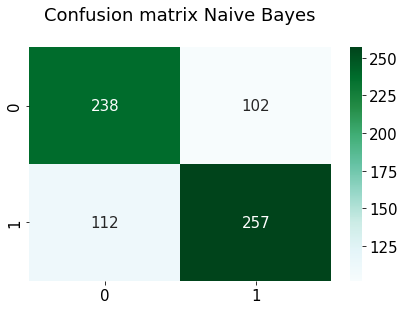

In [ ]:
#Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_LR = confusion_matrix(y_test,y_pred_nb)
sn.heatmap(confusion_matrix_LR, annot=True,cmap="BuGn" , fmt='g')
plt.tight_layout()
plt.title('Confusion matrix Naive Bayes\n')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69       340
           1       0.72      0.70      0.71       369

    accuracy                           0.70       709
   macro avg       0.70      0.70      0.70       709
weighted avg       0.70      0.70      0.70       709



In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_nb)

0.6982384823848239

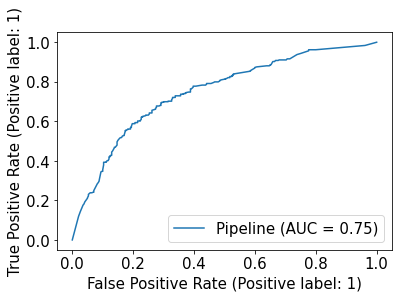

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
metrics.plot_roc_curve(pipeline, X_test, y_test)

plt.show()


## Method IIII: Gradient boosting<font><a name=SVM></a>

### Gradient Boosting: Pipleline and Prediction

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import FunctionTransformer

pipeline = Pipeline(steps=[
                            ('scl',StandardScaler()),
                            ('model', GradientBoostingClassifier(learning_rate = 0.1))
                           ])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scl', StandardScaler()),
                ('model', GradientBoostingClassifier())])

In [ ]:
y_pred_grad_boost = pipeline.predict(X_test)

### Gradient Boosting: Confusion Matrix and performance report

Text(0.5, 1.0, 'Confusion matrix GB\n')

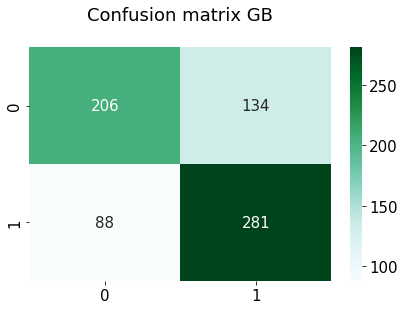

In [ ]:
#Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_LR = confusion_matrix(y_test,y_pred_grad_boost)
sn.heatmap(confusion_matrix_LR, annot=True,cmap="BuGn" , fmt='g')
plt.tight_layout()
plt.title('Confusion matrix GB\n')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred_grad_boost))

              precision    recall  f1-score   support

           0       0.70      0.61      0.65       340
           1       0.68      0.76      0.72       369

    accuracy                           0.69       709
   macro avg       0.69      0.68      0.68       709
weighted avg       0.69      0.69      0.68       709



In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_grad_boost)

0.6836999840586643

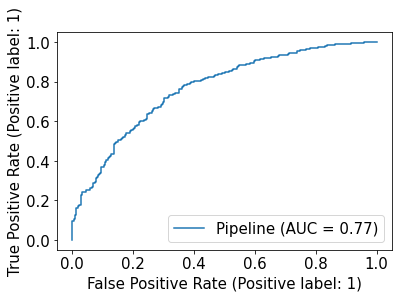

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
metrics.plot_roc_curve(pipeline, X_test, y_test)

plt.show()


## Method IV: Random Forest<font><a name=RF></a>

### RF: Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create the parameter grid based on the results of random search
param_grid = {
    'random_state': [42],
    'n_estimators': [150, 200,250,300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(X_train, y_train)
grid_search.best_params_


Fitting 3 folds for each of 120 candidates, totalling 360 fits


{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 300,
 'random_state': 42}

### RF: Pipleline and Prediction

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import FunctionTransformer

pipeline = Pipeline([('tfidf', )
                           ('model', RandomForestClassifier(n_estimators = 200,random_state=42, max_depth= 4, max_features = 'auto', criterion = 'gini'))
                           ])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('model',
                 RandomForestClassifier(max_depth=4, n_estimators=200,
                                        random_state=42))])

In [ ]:
y_pred_rf = pipeline.predict(X_test)

### RF: Confusion Matrix and performance report

Text(0.5, 1.0, 'Confusion matrix Random Forest\n')

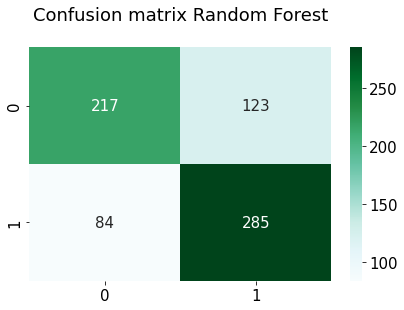

In [ ]:
#Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_LR = confusion_matrix(y_test,y_pred_rf)
sn.heatmap(confusion_matrix_LR, annot=True,cmap="BuGn" , fmt='g')
plt.tight_layout()
plt.title('Confusion matrix Random Forest\n')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.72      0.64      0.68       340
           1       0.70      0.77      0.73       369

    accuracy                           0.71       709
   macro avg       0.71      0.71      0.71       709
weighted avg       0.71      0.71      0.71       709



In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_rf)

0.7052965088474414

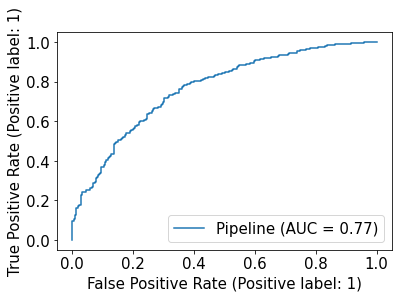

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
metrics.plot_roc_curve(pipeline, X_test, y_test)

plt.show()


## Method V: KNN Nearest Neighbor<font><a name=RF></a>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors= 11, p=2 ,metric='minkowski')
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
y_pred_KNN = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix_KNN = confusion_matrix(y_test, y_pred)
accuracy_score_KNN = accuracy_score(y_test,y_pred_KNN)

Text(0.5, 1.0, 'Confusion matrix KNN Nearest Neighbor\n')

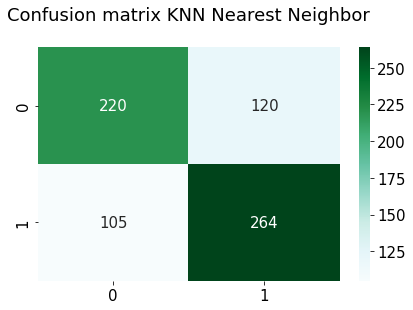

In [ ]:
import seaborn as sn
#Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_KNN = confusion_matrix(y_test,y_pred_KNN)
sn.heatmap(confusion_matrix_KNN, annot=True,cmap="BuGn" , fmt='g')
plt.tight_layout()
plt.title('Confusion matrix KNN Nearest Neighbor\n')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.68      0.65      0.66       340
           1       0.69      0.72      0.70       369

    accuracy                           0.68       709
   macro avg       0.68      0.68      0.68       709
weighted avg       0.68      0.68      0.68       709



# 5. **Simulation**

### We aggregate the teams present in the world cup

In [ ]:
teams = Group_A, Group_B ,Group_C ,Group_D ,Group_E ,Group_F, Group_G, Group_H

In [ ]:
# create a dataframe leaderboard with the teams and their points
leaderboard = pd.DataFrame(columns = ['Team', 'Points'])

# we will add the teams to the leaderboard
for team_group in teams:
    for nation in team_group:
        leaderboard = pd.concat([leaderboard, pd.DataFrame([[nation,0]], columns = ['Team', 'Points'])], axis = 0).reset_index(drop = True)

leaderboard

,Team,Points
0,Qatar,0
1,Ecuador,0
2,Senegal,0
3,Netherlands,0
4,England,0
5,Iran,0
6,United States,0
7,Wales,0
8,Argentina,0
9,Saudi Arabia,0


In [ ]:
def find_stats(team_1):
    past_games = team_status_raw[(team_status_raw["team"] == team_1)].sort_values("date")
    last10 = team_status_raw[(team_status_raw["team"] == team_1)].sort_values("date").tail(10)

    team_1_rank = past_games["rank"].values[-1]
    team_1_goals = past_games.score.mean()
    team_1_goals_l10 = last10.score.mean()
    team_1_goals_suf = past_games.suf_score.mean()
    team_1_goals_suf_l10 = last10.suf_score.mean()
    team_1_rank_suf = past_games.rank_suf.mean()
    team_1_rank_suf_l10 = last10.rank_suf.mean()
    team_1_gp_rank = past_games.points_by_rank.mean()
    team_1_gp_rank_l10 = last10.points_by_rank.mean()

    return [team_1_rank, team_1_goals, team_1_goals_l10, team_1_goals_suf, team_1_goals_suf_l10, team_1_rank_suf, team_1_rank_suf_l10, team_1_gp_rank, team_1_gp_rank_l10]

In [ ]:
def find_features(team_1, team_2):
    rank_dif = team_1[0] - team_2[0]
    goals_dif = team_1[1] - team_2[1]
    goals_dif_l10 = team_1[2] - team_2[2]
    goals_suf_dif = team_1[3] - team_2[3]
    goals_suf_dif_l10 = team_1[4] - team_2[4]
    goals_per_ranking_dif = (team_1[1]/team_1[5]) - (team_2[1]/team_2[5])
    dif_rank_agst = team_1[5] - team_2[5]
    dif_rank_agst_l10 = team_1[6] - team_2[6]
    dif_gp_rank = team_1[7] - team_2[7]
    dif_gp_rank_l10 = team_1[8] - team_2[8]

    return [rank_dif, goals_dif, goals_dif_l10, goals_suf_dif, goals_suf_dif_l10, goals_per_ranking_dif, dif_rank_agst, dif_rank_agst_l10, dif_gp_rank, dif_gp_rank_l10, 1, 0]

In [ ]:
# function that update the leaderboard with the winner of the match
def update_leaderboard_winner(leaderboard, winner):
    leaderboard.loc[leaderboard['Team'] == winner, 'Points'] += 3

    return leaderboard

In [ ]:
group_matches=[]

for index,team in enumerate(teams):
    for i in team:
        for j in team:
            if i != j:
                #check if the same team is playing twice in home or away
                if [i,j,0,0] not in group_matches and [j,i,0,0] not in group_matches:
                    group_matches.append([i,j,0,0])

group_matches_df = pd.DataFrame(group_matches, columns=['home_team','away_team', 'probability of the home team winning', 'probability of the away team winning'])


In [ ]:
# for every match find the features and predict the probability of winning and update the leaderboard
for i in range(len(group_matches_df)):
    home_team = group_matches_df.iloc[i,0]
    away_team = group_matches_df.iloc[i,1]

    home_team_stats = find_stats(home_team)
    away_team_stats = find_stats(away_team)

    features = find_features(home_team_stats, away_team_stats)

    group_matches_df.iloc[i,2] = pipeline.predict_proba([features])[0][0]
    group_matches_df.iloc[i,3] = pipeline.predict_proba([features])[0][1]

    if group_matches_df.iloc[i,2] > group_matches_df.iloc[i,3]:
      leaderboard = update_leaderboard_winner(leaderboard, home_team)
    else:
      leaderboard = update_leaderboard_winner(leaderboard, away_team)

In [ ]:
display(group_matches_df)
print("\nUpdated leaderboard:")
display(leaderboard)

,home_team,away_team,probability of the home team winning,probability of the away team winning
0,Qatar,Ecuador,0.277032,0.722968
1,Qatar,Senegal,0.388431,0.611569
2,Qatar,Netherlands,0.132315,0.867685
3,Ecuador,Senegal,0.543515,0.456485
4,Ecuador,Netherlands,0.190192,0.809808
5,Senegal,Netherlands,0.185797,0.814203
6,England,Iran,0.635963,0.364037
7,England,United States,0.601760,0.398240
8,England,Wales,0.579321,0.420679
9,Iran,United States,0.268469,0.731531



Updated leaderboard:


,Team,Points
0,Qatar,0
1,Ecuador,6
2,Senegal,3
3,Netherlands,9
4,England,9
5,Iran,0
6,United States,3
7,Wales,6
8,Argentina,9
9,Saudi Arabia,0


In [ ]:
round_of_sixteen=[]
# add to the round_of_sixteen the teams that in order of points are in the first 2 positions for each group
for team_group in teams:
    # sort the teams in the group by points
    team_group = leaderboard[leaderboard['Team'].isin(team_group)].sort_values(by = 'Points', ascending = False).reset_index(drop = True)
    # add the first 2 teams to the round_of_sixteen
    round_of_sixteen.append(team_group.iloc[0,0])
    round_of_sixteen.append(team_group.iloc[1,0])

In [ ]:
# the top team in each group will play against the second team in the other group
round_of_sixteen_matches = [[round_of_sixteen[0], round_of_sixteen[3], 0, 0],
                   [round_of_sixteen[4], round_of_sixteen[7], 0, 0],
                   [round_of_sixteen[8], round_of_sixteen[11], 0, 0],
                   [round_of_sixteen[12], round_of_sixteen[15], 0, 0],
                   [round_of_sixteen[2], round_of_sixteen[1], 0, 0],
                   [round_of_sixteen[6], round_of_sixteen[5], 0, 0],
                   [round_of_sixteen[10], round_of_sixteen[9], 0, 0],
                   [round_of_sixteen[14], round_of_sixteen[13], 0, 0]]


round_of_sixteen_matches_df = pd.DataFrame(round_of_sixteen_matches, columns=['home_team','away_team', 'probability of the home team winning', 'probability of the away team winning'])
round_of_sixteen_matches_df

,home_team,away_team,probability of the home team winning,probability of the away team winning
0,Netherlands,Wales,0,0
1,Argentina,Denmark,0,0
2,Spain,Croatia,0,0
3,Brazil,Uruguay,0,0
4,England,Ecuador,0,0
5,France,Poland,0,0
6,Belgium,Germany,0,0
7,Portugal,Switzerland,0,0


In [ ]:
leaderboard_sixteen = pd.DataFrame(columns = ['Team', 'Points'])

for nation in round_of_sixteen:
    leaderboard_sixteen = pd.concat([leaderboard_sixteen, pd.DataFrame([[nation,0]], columns = ['Team', 'Points'])], axis = 0).reset_index(drop = True)

In [ ]:
# for every match find the features and predict the probability of winning and update the leaderboard
for i in range(len(round_of_sixteen_matches_df)):
    home_team = round_of_sixteen_matches_df.iloc[i,0]
    away_team = round_of_sixteen_matches_df.iloc[i,1]

    home_team_stats = find_stats(home_team)
    away_team_stats = find_stats(away_team)

    features = find_features(home_team_stats, away_team_stats)

    round_of_sixteen_matches_df.iloc[i,2] = pipeline.predict_proba([features])[0][0]
    round_of_sixteen_matches_df.iloc[i,3] = pipeline.predict_proba([features])[0][1]

    if round_of_sixteen_matches_df.iloc[i,2] > round_of_sixteen_matches_df.iloc[i,3]:
        leaderboard_sixteen = update_leaderboard_winner(leaderboard_sixteen, home_team)
    else:
        leaderboard_sixteen = update_leaderboard_winner(leaderboard_sixteen, away_team)

In [ ]:
display(round_of_sixteen_matches_df)
print("\nUpdated leaderboard:")
display(leaderboard_sixteen)

,home_team,away_team,probability of the home team winning,probability of the away team winning
0,Netherlands,Wales,0.623462,0.376538
1,Argentina,Denmark,0.550396,0.449604
2,Spain,Croatia,0.565556,0.434444
3,Brazil,Uruguay,0.607102,0.392898
4,England,Ecuador,0.649341,0.350659
5,France,Poland,0.623850,0.376150
6,Belgium,Germany,0.500247,0.499753
7,Portugal,Switzerland,0.506477,0.493523



Updated leaderboard:


,Team,Points
0,Netherlands,3
1,Ecuador,0
2,England,3
3,Wales,0
4,Argentina,3
5,Poland,0
6,France,3
7,Denmark,0
8,Spain,3
9,Germany,0


In [ ]:
quarter_finals=[]
# add to the quarters the teams that in order of points are in the first position for each group
for team_group in teams:
    # sort the teams in the group by points
    team_group = leaderboard_sixteen[leaderboard_sixteen['Team'].isin(team_group)].sort_values(by = 'Points', ascending = False).reset_index(drop = True)
    # add the first team to the quarters
    quarter_finals.append(team_group.iloc[0,0])

In [ ]:
# the top team in the first group will play against the top team in the second group
# the top team in the third group will play against the top team in the fourth group
quarters_matches = [[quarter_finals[0], quarter_finals[2], 0, 0],
                        [quarter_finals[4], quarter_finals[6], 0, 0],
                        [quarter_finals[5], quarter_finals[7], 0, 0],
                        [quarter_finals[1], quarter_finals[3], 0, 0]]

quarters_matches_df = pd.DataFrame(quarters_matches, columns=['home_team','away_team', 'probability of the home team winning', 'probability of the away team winning'])

In [ ]:
leaderboard_quarters = pd.DataFrame(columns = ['Team', 'Points'])

for index in range (len(quarters_matches_df)):
    leaderboard_quarters = pd.concat([leaderboard_quarters, pd.DataFrame([[quarters_matches_df.iloc[index]["home_team"],0]], columns = ['Team', 'Points'])], axis = 0).reset_index(drop = True)
    leaderboard_quarters = pd.concat([leaderboard_quarters, pd.DataFrame([[quarters_matches_df.iloc[index]["away_team"],0]], columns = ['Team', 'Points'])], axis = 0).reset_index(drop = True)


In [ ]:
# for every match find the features and predict the probability of winning and update the leaderboard
for i in range(len(quarters_matches_df)):
    home_team = quarters_matches_df.iloc[i,0]
    away_team = quarters_matches_df.iloc[i,1]

    home_team_stats = find_stats(home_team)
    away_team_stats = find_stats(away_team)

    features = find_features(home_team_stats, away_team_stats)

    quarters_matches_df.iloc[i,2] = pipeline.predict_proba([features])[0][0]
    quarters_matches_df.iloc[i,3] = pipeline.predict_proba([features])[0][1]

    if quarters_matches_df.iloc[i,2] > quarters_matches_df.iloc[i,3]:
        leaderboard_quarters = update_leaderboard_winner(leaderboard_quarters, home_team)
    else:
        leaderboard_quarters = update_leaderboard_winner(leaderboard_quarters, away_team)


In [ ]:
display(quarters_matches_df)
print("\nUpdated leaderboard:")
display(leaderboard_quarters)

,home_team,away_team,probability of the home team winning,probability of the away team winning
0,Netherlands,Argentina,0.452707,0.547293
1,Spain,Brazil,0.263112,0.736888
2,Belgium,Portugal,0.500745,0.499255
3,England,France,0.428051,0.571949



Updated leaderboard:


,Team,Points
0,Netherlands,0
1,Argentina,3
2,Spain,0
3,Brazil,3
4,Belgium,3
5,Portugal,0
6,England,0
7,France,3


In [ ]:
semi_finals=[]

#sort the teams in the leaderboard by points
leaderboard_quarters = leaderboard_quarters.sort_values(by = 'Points', ascending = False).reset_index(drop = True)

# add to the semi finals the two teams that in order of points are on the first position by couple
for index in range(len(leaderboard_quarters)):
    if index<len(leaderboard_quarters)/2:
        semi_finals.append(leaderboard_quarters.iloc[index,0])


In [ ]:
# the top team in the first group will play against the top team in the second group
# the top team in the third group will play against the top team in the fourth group
semi_finals_matches = [[semi_finals[0], semi_finals[1], 0, 0],
                        [semi_finals[2], semi_finals[3], 0, 0]]

semi_finals_matches_df = pd.DataFrame(semi_finals_matches, columns=['home_team','away_team', 'probability of the home team winning', 'probability of the away team winning'])

In [ ]:
leaderboard_semi_finals = pd.DataFrame(columns = ['Team', 'Points'])

for nation in semi_finals:
    leaderboard_semi_finals = pd.concat([leaderboard_semi_finals, pd.DataFrame([[nation,0]], columns = ['Team', 'Points'])], axis = 0).reset_index(drop = True)

In [ ]:
# for every match find the features and predict the probability of winning and update the leaderboard
for i in range(len(semi_finals_matches_df)):
    home_team = semi_finals_matches_df.iloc[i,0]
    away_team = semi_finals_matches_df.iloc[i,1]

    home_team_stats = find_stats(home_team)
    away_team_stats = find_stats(away_team)

    features = find_features(home_team_stats, away_team_stats)

    semi_finals_matches_df.iloc[i,2] = pipeline.predict_proba([features])[0][0]
    semi_finals_matches_df.iloc[i,3] = pipeline.predict_proba([features])[0][1]

    if semi_finals_matches_df.iloc[i,2] > semi_finals_matches_df.iloc[i,3]:
        leaderboard_semi_finals = update_leaderboard_winner(leaderboard_semi_finals, home_team)
    else:
        leaderboard_semi_finals = update_leaderboard_winner(leaderboard_semi_finals, away_team)

In [ ]:
display(semi_finals_matches_df)
print("\nUpdated leaderboard:")
display(leaderboard_semi_finals)

,home_team,away_team,probability of the home team winning,probability of the away team winning
0,Argentina,Brazil,0.247066,0.752934
1,Belgium,France,0.436408,0.563592



Updated leaderboard:


,Team,Points
0,Argentina,0
1,Brazil,3
2,Belgium,0
3,France,3


In [ ]:
leaderboard_semi_finals = leaderboard_semi_finals.sort_values(by = 'Points', ascending = False).reset_index(drop = True)
finals_matches = [[leaderboard_semi_finals.iloc[0,0], leaderboard_semi_finals.iloc[1,0], 0, 0],
                        [leaderboard_semi_finals.iloc[2,0],leaderboard_semi_finals.iloc[3,0], 0, 0]]

finals_matches_df = pd.DataFrame(finals_matches, columns=['home_team','away_team', 'probability of the home team winning', 'probability of the away team winning'])

In [ ]:
# for every match find the features and predict the probability of winning and update the leaderboard
for i in range(len(finals_matches_df)):
    home_team = finals_matches_df.iloc[i,0]
    away_team = finals_matches_df.iloc[i,1]

    home_team_stats = find_stats(home_team)
    away_team_stats = find_stats(away_team)

    features = find_features(home_team_stats, away_team_stats)

    finals_matches_df.iloc[i,2] = pipeline.predict_proba([features])[0][0]
    finals_matches_df.iloc[i,3] = pipeline.predict_proba([features])[0][1]

    if finals_matches_df.iloc[i,2] > finals_matches_df.iloc[i,3]:
        leaderboard_semi_finals = update_leaderboard_winner(leaderboard_semi_finals, home_team)
    else:
        leaderboard_semi_finals = update_leaderboard_winner(leaderboard_semi_finals, away_team)

In [ ]:
display(finals_matches_df)
print("\nUpdated leaderboard:")
display(leaderboard_semi_finals)

,home_team,away_team,probability of the home team winning,probability of the away team winning
0,Brazil,France,0.510069,0.489931
1,Argentina,Belgium,0.438934,0.561066



Updated leaderboard:


,Team,Points
0,Brazil,6
1,France,3
2,Argentina,0
3,Belgium,3


In [ ]:
#divide the leaderboard in finals and third place
leaderboard_semi_finals_1 = leaderboard_semi_finals.iloc[0:2,:].sort_values(by = 'Points', ascending = False).reset_index(drop = True)
leaderboard_semi_finals_2 = leaderboard_semi_finals.iloc[2:4,:].sort_values(by = 'Points', ascending = False).reset_index(drop = True)

In [ ]:
#print the leadeboard of the world cup
print("The winner of the world cup is: " + leaderboard_semi_finals_1.iloc[0,0]+"🥇")
print("The second place of the world cup is: " + leaderboard_semi_finals_1.iloc[1,0]+"🥈")
print("The third place goes to: " + leaderboard_semi_finals_2.iloc[0,0]+"🥉")
print("The fourth place goes to: " + leaderboard_semi_finals_2.iloc[1,0])


The winner of the world cup is: Brazil🥇
The second place of the world cup is: France🥈
The third place goes to: Belgium🥉
The fourth place goes to: Argentina


In [ ]:
# function that returns the name with a length of 13
def name_length(name):
    if len(name) < 13:
        return name + " "*(13-len(name))
    else:
        return name

In [ ]:
# function that returns the name with a length of 13
def name_length_start(name):
    if len(name) < 13:
        return " "*(13-len(name)) + name
    else:
        return name

In [ ]:
print(name_length(round_of_sixteen_matches[0][0])+'━━━━┓                                                                                                                                   ┏━━━━ '+(round_of_sixteen_matches[4][0]))
print('                 ┃                                                                                                                                   ┃')
print('                 ┃━━━━ '+name_length(quarters_matches[0][0])+'━━━━┓                                                                                     ┏━━━━'+name_length_start(quarters_matches[3][0])+' ━━━━┃')
print('                 ┃                      ┃                                                                                     ┃                      ┃')
print(name_length(round_of_sixteen_matches[0][1])+'━━━━┛                      ┃                                                                                     ┃                      ┗━━━━ '+(round_of_sixteen_matches[4][1]))
print('                                        ┃━━━━ '+name_length(semi_finals_matches[0][0])+'━━━━┓                                       ┏━━━━'+name_length_start(semi_finals_matches[1][1])+' ━━━━┃')
print(name_length(round_of_sixteen_matches[1][0])+'━━━━┓                      ┃                      ┃                                       ┃                      ┃                      ┏━━━━ '+(round_of_sixteen_matches[5][0]))
print('                 ┃                      ┃                      ┃                                       ┃                      ┃                      ┃')
print('                 ┃━━━━ '+name_length(quarters_matches[0][1])+'━━━━┛                      ┃                                       ┃                      ┗━━━━'+name_length_start(quarters_matches[3][1])+' ━━━━┃')
print('                 ┃                                             ┃                                       ┃                                             ┃')
print(name_length(round_of_sixteen_matches[1][1])+'━━━━┛                                             ┃                                       ┃                                             ┗━━━━ '+(round_of_sixteen_matches[5][1]))
print('                                                               ┃━━━━ '+name_length(finals_matches[0][0])+'vs.'+name_length_start(finals_matches[0][1])+' ━━━━┃')
print(name_length(round_of_sixteen_matches[2][0])+'━━━━┓                                             ┃                                       ┃                                             ┏━━━━ '+(round_of_sixteen_matches[6][0]))
print('                 ┃                                             ┃                                       ┃                                             ┃')
print('                 ┃━━━━ '+name_length(quarters_matches[1][0])+'━━━━┓                      ┃                                       ┃                      ┏━━━━'+name_length_start(quarters_matches[2][0])+' ━━━━┃')
print('                 ┃                      ┃                      ┃                                       ┃                      ┃                      ┃')
print(name_length(round_of_sixteen_matches[2][1])+'━━━━┛                      ┃                      ┃                                       ┃                      ┃                      ┗━━━━ '+(round_of_sixteen_matches[6][1]))
print('                                        ┃━━━━ '+name_length(semi_finals_matches[0][1])+'━━━━┛                                       ┗━━━━'+name_length_start(semi_finals_matches[1][0])+' ━━━━┃')
print(name_length(round_of_sixteen_matches[3][0])+'━━━━┓                      ┃                                                                                     ┃                      ┏━━━━ '+(round_of_sixteen_matches[7][0]))
print('                 ┃                      ┃                                                                                     ┃                      ┃')
print('                 ┃━━━━ '+name_length(quarters_matches[1][1])+'━━━━┛                                                                                     ┗━━━━'+name_length_start(quarters_matches[2][1])+' ━━━━┃')
print('                 ┃                                                                                                                                   ┃')
print(name_length(round_of_sixteen_matches[3][1])+'━━━━┛                                                                                                                                   ┗━━━━ '+(round_of_sixteen_matches[7][1]))

Netherlands  ━━━━┓                                                                                                                                   ┏━━━━ England
                 ┃                                                                                                                                   ┃
                 ┃━━━━ Netherlands  ━━━━┓                                                                                     ┏━━━━      England ━━━━┃
                 ┃                      ┃                                                                                     ┃                      ┃
Wales        ━━━━┛                      ┃                                                                                     ┃                      ┗━━━━ Ecuador
                                        ┃━━━━ Argentina    ━━━━┓                                       ┏━━━━       France ━━━━┃
Argentina    ━━━━┓                      ┃                      ┃                             

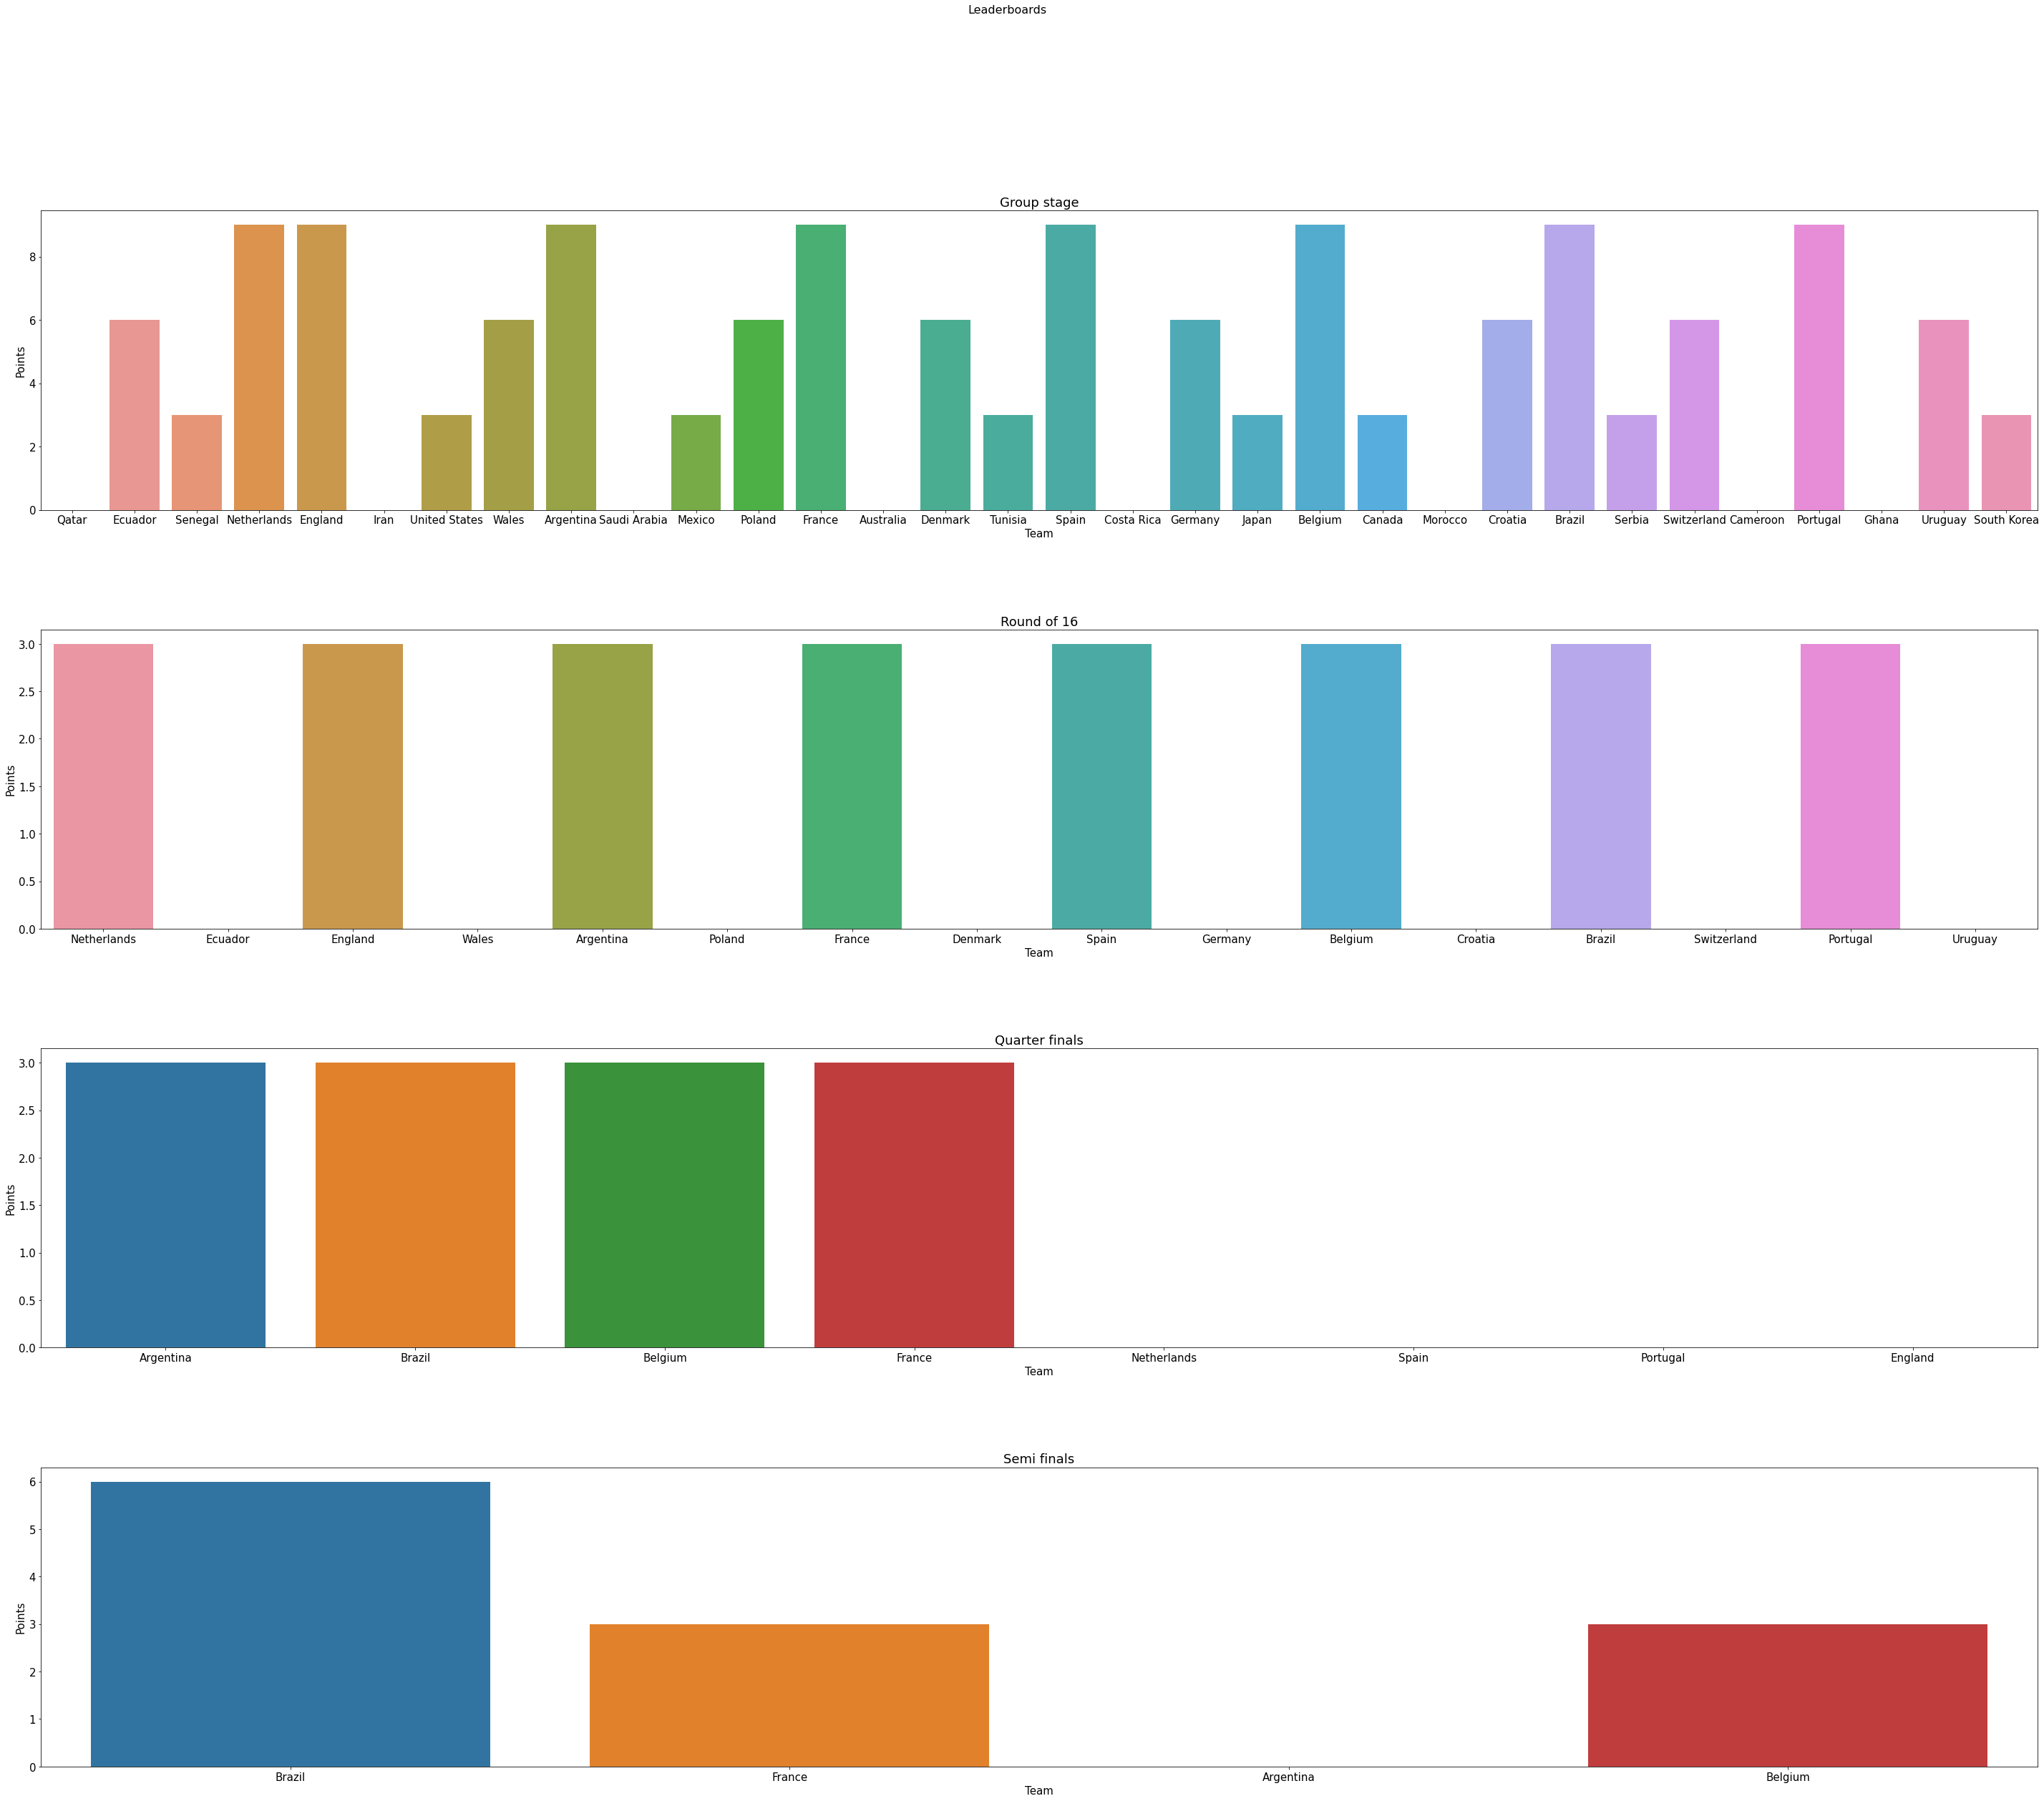

In [ ]:
# function to show all the leaderboards with a diagram
def show_leaderboards():
    # create the figure
    fig = plt.figure(figsize=(50, 40))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    plt.tight_layout()

    # add the first subplot
    ax1 = fig.add_subplot(4, 1, 1)

    # add the second subplot
    ax2 = fig.add_subplot(4, 1, 2)

    # add the third subplot
    ax3 = fig.add_subplot(4, 1, 3)

    # add the fourth subplot
    ax4 = fig.add_subplot(4, 1, 4)

    # add the title
    fig.suptitle('Leaderboards', fontsize=16)
    # add the title of the first subplot
    ax1.set_title('Group stage')
    # add the title of the second subplot
    ax2.set_title('Round of 16')
    # add the title of the third subplot
    ax3.set_title('Quarter finals')
    # add the title of the fourth subplot
    ax4.set_title('Semi finals')
    # add the first leaderboard
    sns.barplot(x = 'Team', y = 'Points', data = leaderboard, ax = ax1)
    # add the second leaderboard

    sns.barplot(x = 'Team', y = 'Points', data = leaderboard_sixteen, ax = ax2)
    # add the third leaderboard
    sns.barplot(x = 'Team', y = 'Points', data = leaderboard_quarters, ax = ax3)
    # add the fourth leaderboard
    sns.barplot(x = 'Team', y = 'Points', data = leaderboard_semi_finals, ax = ax4)
    # show the figure
    plt.show()

show_leaderboards()

# **References**

1. https://www.kaggle.com/code/agostontorok/soccer-world-cup-2018-winner
2. https://www.kaggle.com/code/sslp23/predicting-fifa-2022-world-cup-with-ml
3. https://towardsdatascience.com/hyperparameters-optimization-526348bb8e2d
4. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
5. https://towardsdatascience.com/cross-validation-and-hyperparameter-tuning-how-to-optimise-your-machine-learning-model-13f005af9d7d